# Mandal Motor’s Customer Segmentation Problem

## Context: 
### Mandal Motors Enters a New Market
Automobile company Mandal Motors has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, the head of sales Sylvester Sneekly deduced that the behavior of new market is similar to their existing market. In Mandal Motors’ existing market, Sneekly’s sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

### Mandal Motor’s Customer Segmentation Problem
The new manager Penelope Pitstop needs to identify which segment these new potential customers belong so as to maximize the impact of their marketing strategy. 


## Customer Segmentation
### Definition and Application
Companies utilize customer segmentation to maximize the value (revenue and/or profit) from each customer. These companies understand that there customers are not homogenous and that their marketing efforts would be more efficient if they target specific, smaller groups within their client bases with messages that those customers would find relevant and lead them to buy something. Customer segmentation then is the process of clustering customers into groups based on identifiable characteristics so as to market to each group effectively and appropriately.

## Data
### Overview
The data will consist of two data sets:
1. An 8068 customer sample from the most recent snap shot of Mandal Motors customer data.
2. A 2067  potential customer data set in the new market collected by Sneakly’ sales team

Both datasets includes customer information such as gender, marriage status, age, years of education, years of work experience, spending score, family size, anonymized category for the customer. Dataset A also includes the (target) Customer Segment of the customer.

Dataset A will be used to train the machine learning model to forecast the customer segmentation in Dataset B.


### Potential Obstacles
For Mandal Motors there is a potential complication in the fact they only have a snapshot of the most recent customer segmentation data they have in their old market. So already we know that the customer journey differs from data set A and data setB. There are no records of what the customer segmentation in Mandal Motors was over time or when entering previous new markets, or if customer segmentation changed as mandal motors was established. 
Further while the new and old markets are similar they are not identical. This implies that there are potential underlying differences between datasets A and B making and model trained on dataset A for datset B less accurate. Going forward it also implies that Mandal Motors will need to refresh this model with new data from the new market.

Envisioned Approach
Part 1 on Dataset A
1.	Overall Explore Data Analysis
    * determine size, number of null
2.	Univariate Explore Data Analysis
    * To understand variables range/size and identify how features might affect classification. 
    * Remove duplicate rows in dataset A
3.	Multivariate Explore data Analysis
    * To see what potential correlations within variable to watch for/ manipulate.
4.	Impute/Manipulate features. 
    * Includes pipeline of: label encoding, data scaling
    * data splitting (Train (60), Validate (25), Test (15) ) 
5.	Choose between 4 Classifiers [LGBM, Random Forest with impute, KNN with impute, ] to train model
    * Hyper tune parameters for each class with the  train data se
    * Evaluate on the validate data set
6.	Train chosen classifier 
    * Combine train+validate datasets into dataset ttrain. Train classifier on ttrain dataset
    * Evaluate on test data set to see likely accuracy
Part 2 on Dataset B
7.  Repeat feature imputation/manipulation that happened on dataset A onto dataset B
8.	Classify customers in dataset  B using  trained classifer from step 6


### Criteria for Success: 
The new model’s prediction for the new market should have at least a 50% accuracy rate and 50% precision rate.

This matches Mandal Motors classification market for the old market.

## Importing Data:

In [244]:
#load python packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [245]:
#Loading Data
#Get Path
import os
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
sub_file = 'data'
file1 = 'train.csv'
file2 = 'test.csv'
file_name_path1 = os.path.join(basepath, sub_file, file1)
file_name_path2 = os.path.join(basepath, sub_file, file2)
train= pd.read_csv(file_name_path1)
test= pd.read_csv(file_name_path2)

C:\Users\Tiki\Documents\Sprinboard2\Capstone2
['.ipynb_checkpoints', 'Age vs Segment.png', 'archive', 'archive.zip', 'BI track_Proposal Auto Customer Segmentation.docx', 'Buisness Proposals.docx', 'correlation.png', 'Countplot Ever_Married .png', 'Countplot Gender .png', 'Countplot Graduated .png', 'data', 'EDA Capstone2.ipynb', 'eda v2 Capstone.ipynb', 'Figx_ModelComparison.png', 'Final Modeling.ipynb', 'KDE Married Family Size.png', 'Marraige Graudation Age Segmentation.png', 'Marraige Graudation Segmentation.png', 'Modeling.ipynb', 'personicon.png', 'sample.png', 'Segment Graph.png', 'Segmentation.png', 'Untitled.ipynb', '~$ track_Proposal Auto Customer Segmentation.docx']


## Data Wrangling

### Overview

In [246]:
print(train.shape) #print size
train.head() #display first five rows

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000,Low,4.000,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,nan,Average,3.000,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000,Low,1.000,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000,High,2.000,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,nan,High,6.000,Cat_6,A


In [247]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

Lot of the category variables have very few variables. This makes using them as dividers easiers

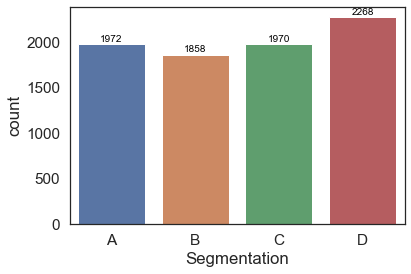

In [248]:
chart = sns.countplot(data= train, x='Segmentation', order = ['A', 'B','C','D'])
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

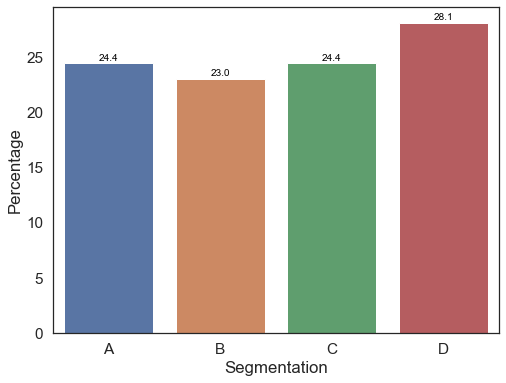

In [249]:
tsd= train['Segmentation'].value_counts(normalize=True).mul(100).rename('Percentage').rename_axis('Segmentation').reset_index()
plt.figure(figsize=(8, 6))
chart=sns.barplot(data= tsd, x='Segmentation',y='Percentage', order = ['A', 'B','C','D'])
for p in chart.patches:
             chart.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.savefig('Segmentation')

<AxesSubplot:>

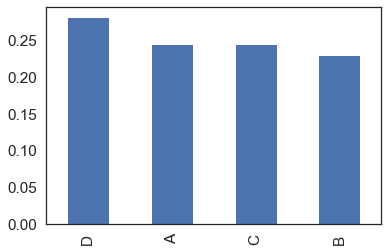

In [250]:
train['Segmentation'].value_counts(normalize=True).plot(kind='bar')

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


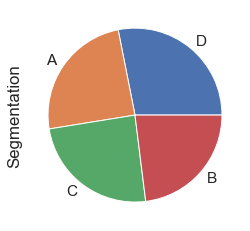

In [251]:
#review variable we are classifying
print(train['Segmentation'].value_counts())
train['Segmentation'].value_counts().plot.pie()
plt.savefig('Segment Graph')

###  Data Cleaning- Duplicates

In [252]:
print('# of duplicate IDs in train data is',sum(train['ID'].value_counts()>1))

print('There are no direct duplicates to remove')

# of duplicate IDs in train data is 0
There are no direct duplicates to remove


In [253]:
#Count where everything is the same but ID
z= train.drop(columns=['ID'])
print('# of rows in train =' , z.shape[0])
print('# of rows in train when duplicate rows (ignoring ID) are droped ' , z.drop_duplicates().shape[0])
print('This tells us there are pottentially ',  z.shape[0] - z.drop_duplicates().shape[0], 'duplicate rows')

#How much does this not explain the data
z= train.drop(columns=['ID', 'Segmentation'])
print('# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped ' , z.drop_duplicates().shape[0])
print('This tells us thereis a variable we are missing out in for at least',  z.shape[0] - z.drop_duplicates().shape[0], 'rows')


# of rows in train = 8068
# of rows in train when duplicate rows (ignoring ID) are droped  7651
This tells us there are pottentially  417 duplicate rows
# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped  7334
This tells us thereis a variable we are missing out in for at least 734 rows


### Data Cleaning- Reducing Number of Nulls

In [254]:
#Print the columns names of the entire dataframe
print(train.columns)
# Review the column names, null value counts and data types of your data frame.
train.info()

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [255]:
# how many null values 
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<AxesSubplot:>

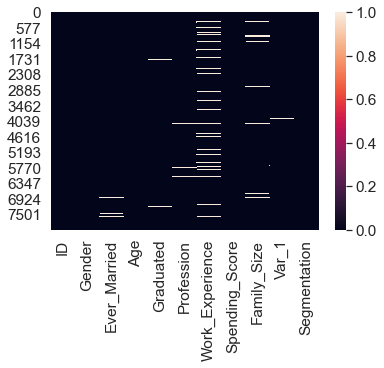

In [256]:
#Visualization to check for missing values
sns.heatmap(train.isna())

Not much overlap on null values in the row so getting rid of all rows with null is not that useful. That said it does mean that if there are more than one null in the row that row is an outlier.

Further most nulls as we can tell are in work experience

In [257]:
train= train.dropna(thresh=8)
#train=train.dropna(subset=[n for n in train if n != 'Work_Experience'], thresh=9)
train=train.dropna(subset=[n for n in train if (n != 'Work_Experience') | (n != 'Family_Size')], thresh=10)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7909 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7909 non-null   int64  
 1   Gender           7909 non-null   object 
 2   Ever_Married     7806 non-null   object 
 3   Age              7909 non-null   int64  
 4   Graduated        7856 non-null   object 
 5   Profession       7825 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   7909 non-null   object 
 8   Family_Size      7669 non-null   float64
 9   Var_1            7856 non-null   object 
 10  Segmentation     7909 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 741.5+ KB


Fill category variables for large values with 'Missing'. Exception Var_1 which the company themselves created (as it is our own product). As there are Categories 1 to 6 we make this 'Cat_0'

In [258]:
print(train['Var_1'].value_counts())
train['Ever_Married'] = train['Ever_Married'].fillna('zMissing')
train['Graduated'] = train['Graduated'].fillna('zMissing')
train['Profession'] = train['Profession'].fillna('zMissing')
train['Var_1'] = train['Var_1'].fillna('Cat_0')
train.info()

Cat_6    5179
Cat_4    1063
Cat_3     784
Cat_2     419
Cat_7     199
Cat_1     129
Cat_5      83
Name: Var_1, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7909 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7909 non-null   int64  
 1   Gender           7909 non-null   object 
 2   Ever_Married     7909 non-null   object 
 3   Age              7909 non-null   int64  
 4   Graduated        7909 non-null   object 
 5   Profession       7909 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   7909 non-null   object 
 8   Family_Size      7669 non-null   float64
 9   Var_1            7909 non-null   object 
 10  Segmentation     7909 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 741.5+ KB


I will use an iterave imputater on my machine learning classification model for the numerical features that have missing aka "work esperience" and "size"

In [259]:
#finding categorical data
print(train.dtypes)
categorical_features = train.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
total categorical_features 7


Potentially there are 417 duplicate rows where they randomly got assigned another ID. However we cannot garantee that. 

We also know there is a potential variable missing because there are customers who have all the same features as another customer (barring ID) except for their segmentsegment. 

## EDA 

### Univariate EDA Numerical-  (Also includes outlier data cleaning)

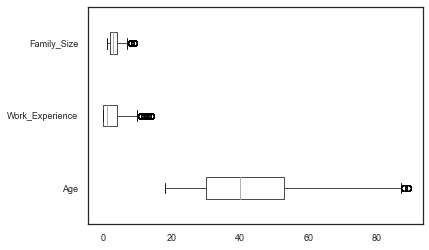

In [260]:
boxplot = train.drop(columns=['ID']).boxplot(grid=False, vert=False,fontsize=9)

In [261]:
train.describe(percentiles= [0.05, .25, .5, .75, 0.95])

,ID,Age,Work_Experience,Family_Size
count,7909.000,7909.000,7198.000,7669.000
mean,463494.127,43.472,2.638,2.850
std,2591.404,16.661,3.406,1.531
min,458982.000,18.000,0.000,1.000
5%,459440.800,21.000,0.000,1.000
25%,461274.000,30.000,0.000,2.000
50%,463492.000,40.000,1.000,3.000
75%,465755.000,53.000,4.000,4.000
95%,467524.600,77.000,9.000,6.000
max,467974.000,89.000,14.000,9.000


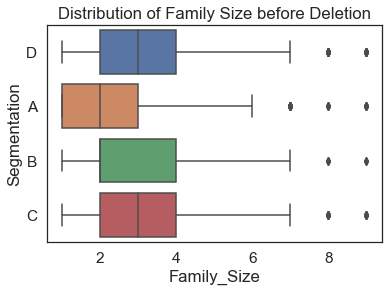

In [262]:
#Investigate Family_Size using boxplot
sns.boxplot(x='Family_Size', y='Segmentation', data=train)
plt.title("Distribution of Family Size before Deletion")
plt.show()
#Outliers Ages 8 and 9

In [263]:
#train.groupby('Family_Size').Segmentation.value_counts()
table = pd.pivot_table(train[['Family_Size', 'Segmentation', 'ID']], index=['Family_Size'], columns=['Segmentation'], aggfunc='count')
train = train[ train['Family_Size']<8]
#At Family Size 7 and greater there are less than 3% of the people.So we eliminate them

#### Outliers Family size
Family Size skew left with over 85% of customers having a family size of 4 or less and only
At Family Size 7 and greater there are less than 3% of the people.So we eliminate them

Text(0.5, 1.0, 'Distribution of Age before deletion')

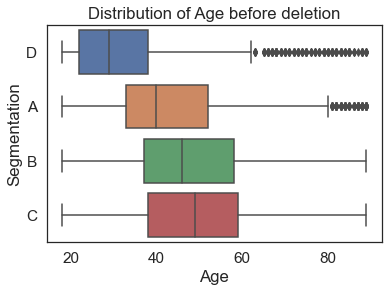

In [264]:
#Investigate Age using boxplot
sns.boxplot(x='Age', y='Segmentation', data=train)
plt.title("Distribution of Age before deletion")


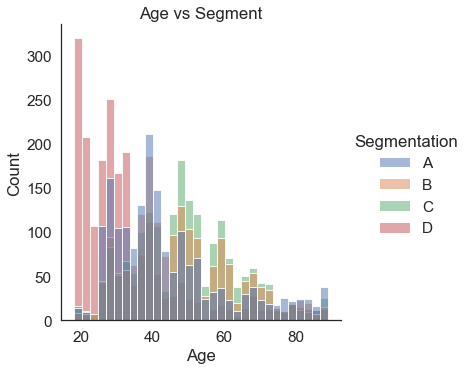

In [265]:
sns.displot(x='Age', hue='Segmentation', data=train,  hue_order = ['A', 'B','C','D'])
plt.title('Age vs Segment')
plt.savefig('Age vs Segment')


#### Outliers Age
No outliers found. If we look at segment B and C we notice that the entire Age is within the box and whisker's plot. 

Other notes: Age does skew left though for Segment D. Though the skew is not as grand for A they average age is younger for segment A customers than B or C. 

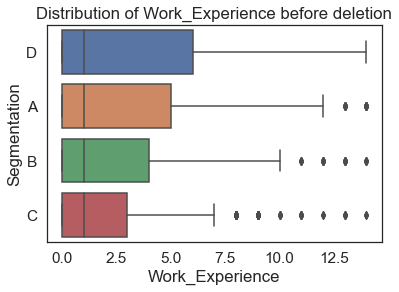

In [266]:
#Investigate Age using boxplot
sns.boxplot(x='Work_Experience', y='Segmentation', data=train)
plt.title("Distribution of Work_Experience before deletion")
plt.show()
#Outliers:NA -Looking at outliers  in Work_Experience from a segmentation point of view we see no outliers in segment D

#### Outliers Work Experience
No outliers found. If we look at segment D we see that the entire work experience range is in the box and whiskers.

#### Notes EDA Univariate Numeric
Segment D skews Young and with large amount of work experience.
Segment A likely has a family size 3 or less, are relatively young and havemore work experience
Segments B and C customers skew older and usually have less work experience than segments D and A

### EDA- Univariate Categorical

In [267]:
# groupby to create another dataframe
def quick_bargraph(q, df):
    """
    Put in variable name and dataset
    ___
    Returns:  count graph, and percent graph
    """
    p= 'Segmentation'
    df_pcts = (df.groupby(q).Segmentation.value_counts(normalize=True).mul(100)
              .unstack().stack(dropna=False).fillna(0)
              .rename('Percent').reset_index())
    df=df.sort_values(by=[q,p])
    df_pcts=df_pcts.sort_values(by=[q,p])
    # create my bar plot
    fig, axs = plt.subplots(2, 2, figsize=(14,5), sharex=True)
    fig.suptitle('{} with regard to {}'.format(p,q), fontsize=16, y=1 , x= 0.45)

    ax1 = plt.subplot(121)

    sns.countplot(x=q ,hue=p, data=df,  hue_order = ['A', 'B','C','D'])
    plt.legend([],[], frameon=False)
    plt.title("As Number of Individiuals")

    # label the bars
    for ps in ax1.patches:
        ax1.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), 
            fontsize=10, color='black', ha='center', va='bottom')

    ax2 = plt.subplot(122)
    sns.barplot(x=q, hue=p,  y="Percent", hue_order = ['A', 'B','C','D'] , data=df_pcts, ci = None)
    plt.title("As a Percentage of Inidivduals within {}".format(q))
    yt= 'Percentage (%)'

    # label the bars
    for p in ax2.patches:
        ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d%%' % round(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
    plt.legend(bbox_to_anchor=(1.05, 1), title='Segmentation', loc=2, borderaxespad=0.)
    ts = "Countplot {} ".format(q)
    plt.savefig(ts)
    plt.show()


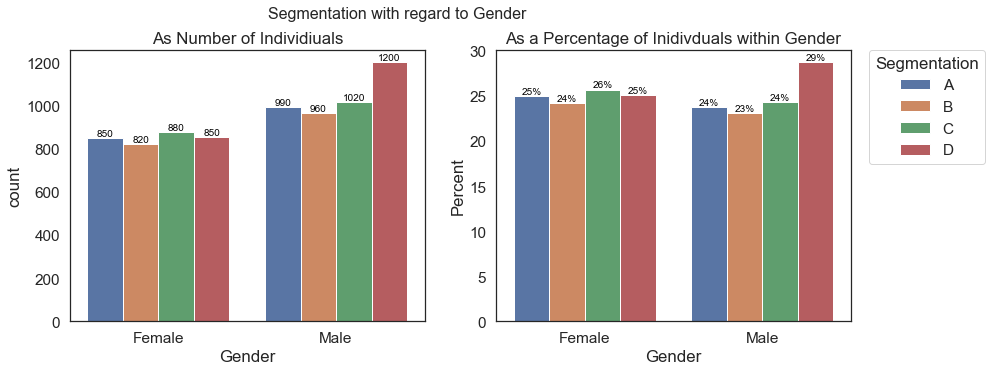

In [268]:
quick_bargraph('Gender', train)

#### Gender Segment 
Overall: More Men clients then female
Men: More likely to be Segment D
Segment D: More likey to be Men

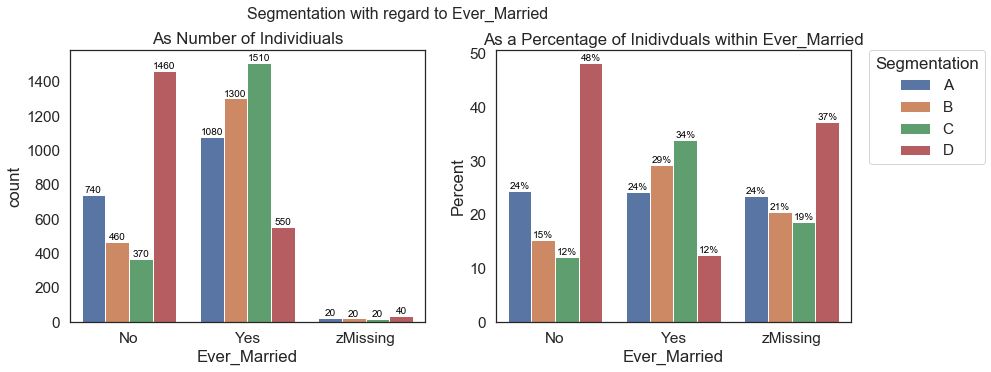

In [269]:
quick_bargraph('Ever_Married', train)

#### Ever Married
Segment D is usually Single: We can see from the above graph that if you are single you have a 50% likelood of being D segmentation. Once you get married that drops to around 13%

Segments B and C: Over a 75% likelyhood of being Married to being single

Segment A: Skews to being Married t

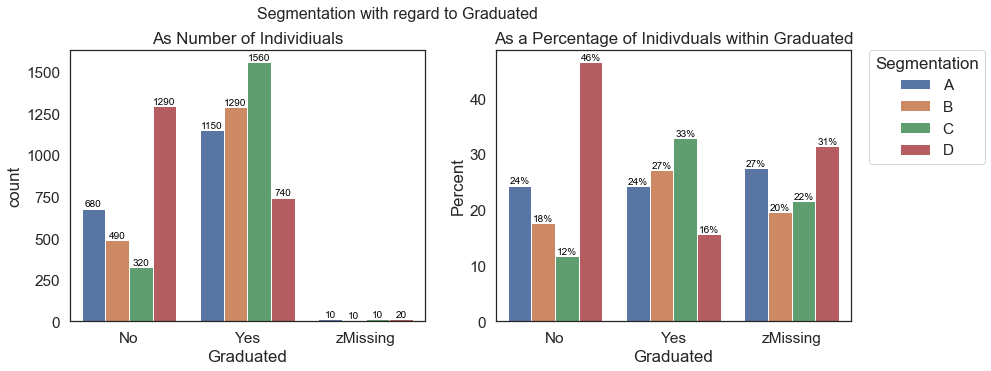

In [270]:
quick_bargraph('Graduated', train)

One key note here is that not graduated and Single seem to act in a simalar matter. We should see if they compound each other's effects

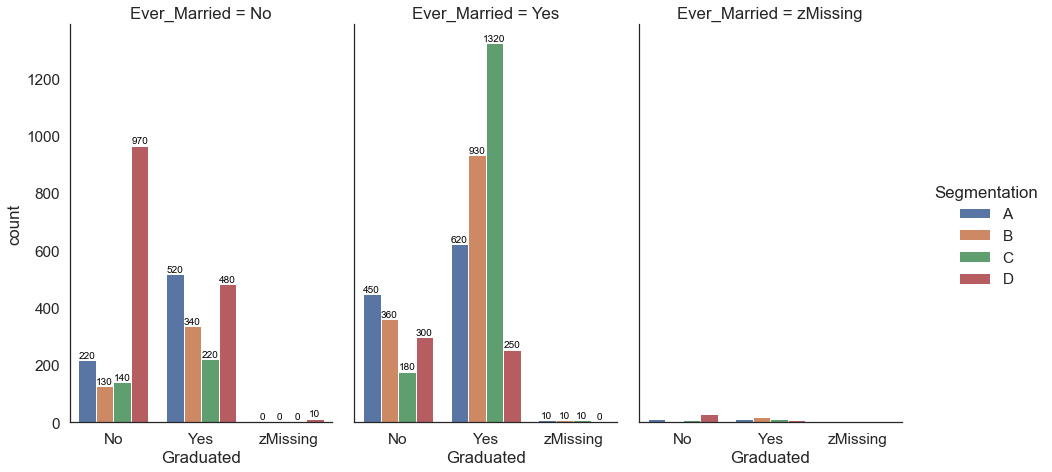

In [271]:
#trainx =train[(train.Graduated != 'zMissing') & (train.Ever_Married != 'zMissing') & (train.Age != 'zMissing')]

g=sns.catplot(x="Graduated", hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="count", height=4, aspect=.7)

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
for i in np.arange(2):
    ax = g.facet_axis(0, i)
    # iterate through the axes containers
    for ps in ax.patches:
        ax.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), fontsize=10,
                color='black', ha='center', va='bottom')

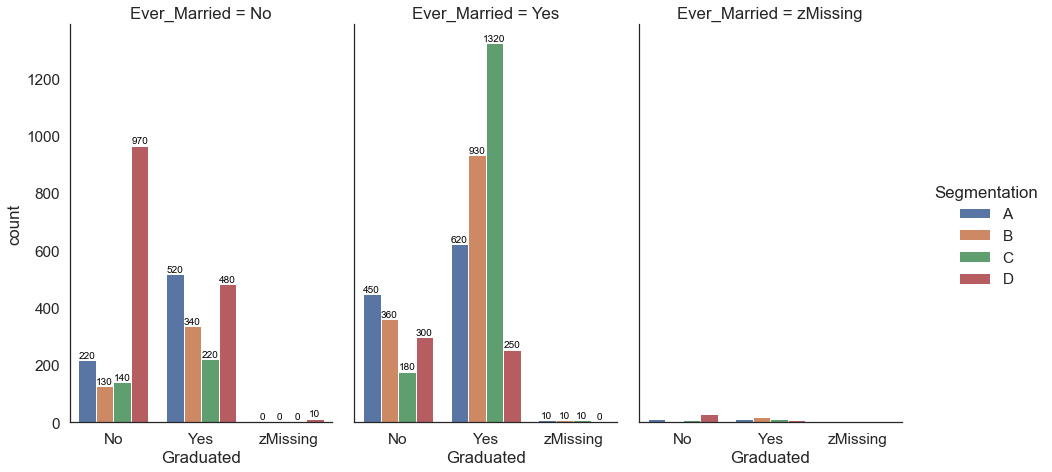

In [272]:
g=sns.catplot(x="Graduated", hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="count", height=4, aspect=.7)

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)



# extract the matplotlib axes_subplot objects from the FacetGrid
for i in np.arange(2):
    ax = g.facet_axis(0, i)
    # iterate through the axes containers
    for ps in ax.patches:
        ax.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), fontsize=10,
                color='black', ha='center', va='bottom')

g.savefig('Marraige Graudation Segmentation')



##### Single and Grduated
Interesting! 

If you are segment C you have a 70% likelihood of being both married and a graduate. 

If you are married and you have graduated you are most likely to be in segment C followed B then A. If you are married and not graduated you are most likely segment A

If you are single and you haven't graduated you have a 2 of 3 chance of being segment D. However if you are single and you have single and graduated you have an around an 1 of 3 chance of being A or D

Does this have an age Dynamic?

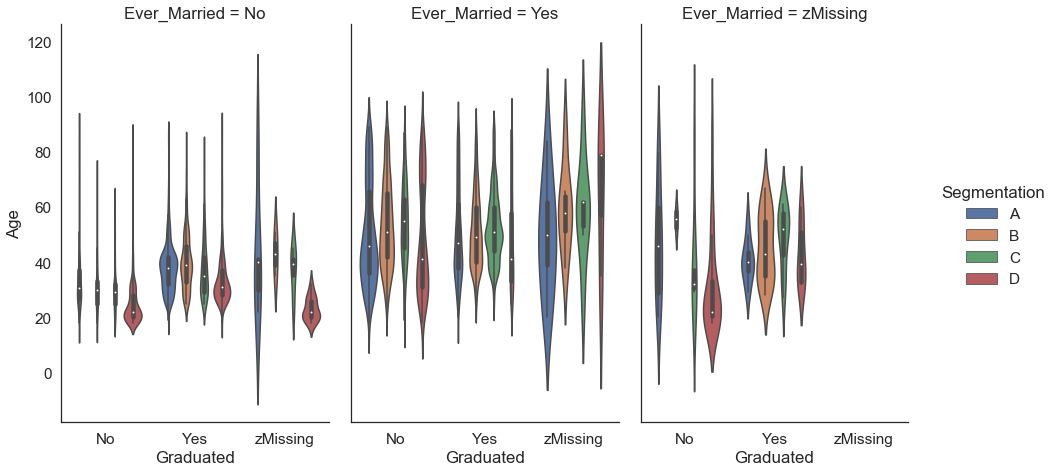

In [273]:
g=sns.catplot(x="Graduated", y='Age', hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="violin", height=4, aspect=.7, scale='count')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

g.savefig('Marraige Graudation Age Segmentation')


##### Single and Graduated (cont)
It does. D does skew young if you are not married. Orinally we said you had graduated and are not married you have an appromimate equal likelihood of being A or C. Now we can clarify that now . If you graduated, single and under 30 yrs old you are more likely to be in Segment D.  If you graduated, single and over 30 you are more likely to be segment D 

##### Spending Score

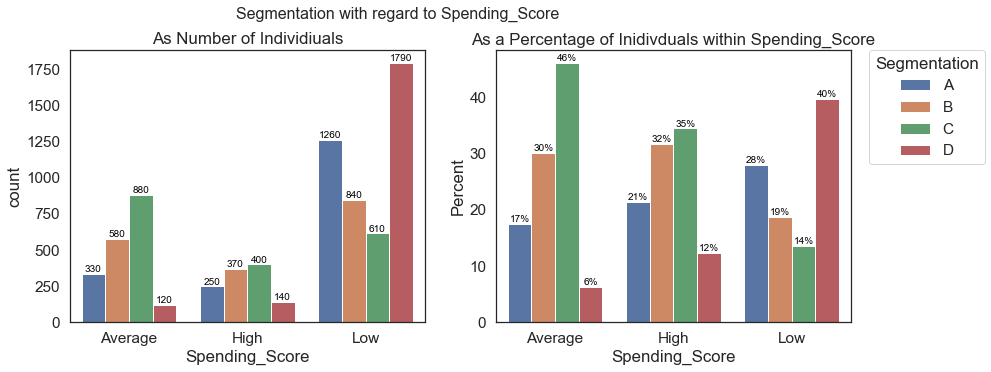

In [274]:
quick_bargraph('Spending_Score', train)

##### Spending Score
Low spending score means likely D followed by A.  Average score means 50% likelihood C. This make

### Bivariate EDA

<AxesSubplot:>

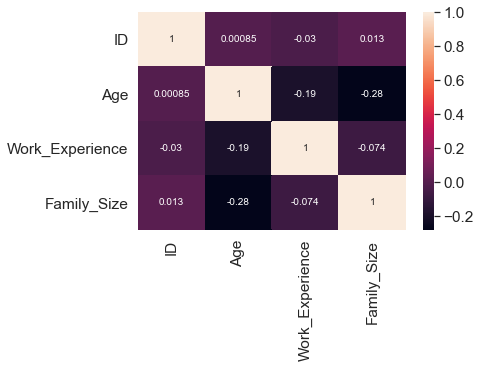

In [275]:
sns.heatmap(train.corr(),annot=True) 
#No really high correlation which is surpising since Age should correlate with work experience

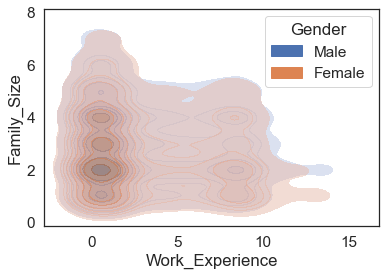

In [276]:
#kde plot Work Experience            
ax= sns.kdeplot(x="Work_Experience", y="Family_Size",data=train, fill= True, hue= 'Gender', alpha=0.5 )
#We see  a huge group ing at family size 3 and 0 to 1 years of work experience. This makes sense

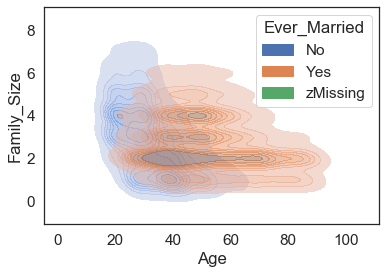

In [277]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Ever_Married', data=train, alpha=0.5, fill= True)

Married and Single act differently with regard to Age and family size. 
If you are single:
* there is a cluster at 1 person family size centered at Age 40. 
* There is a cluster for 2 to 4 person family size centered around ages 20 to 30. 

If you are Married:
* there is a cluster at 2 person family size centered at ages 25 to 40. 
* There is a cluster for 3 person family size ages 30 to 50. 
* There is a cluster for 4 person family size ages 40 to 50. 

This is just demographic info though

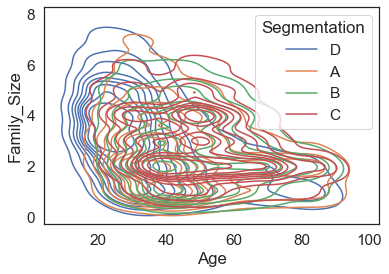

In [278]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=train, )
#There are clusters with Age and family size but we get a whole lot of nothing when graph them together let's seperate it out

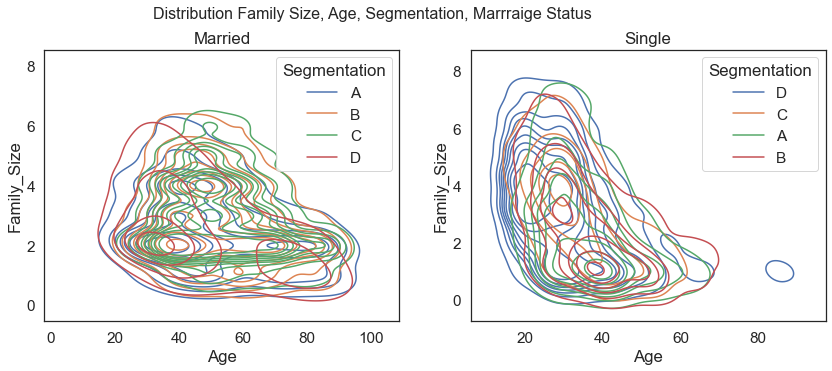

In [279]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")
 #There does appear to be some clear groupings here beyong just single and married.  We will remember this when aking new features

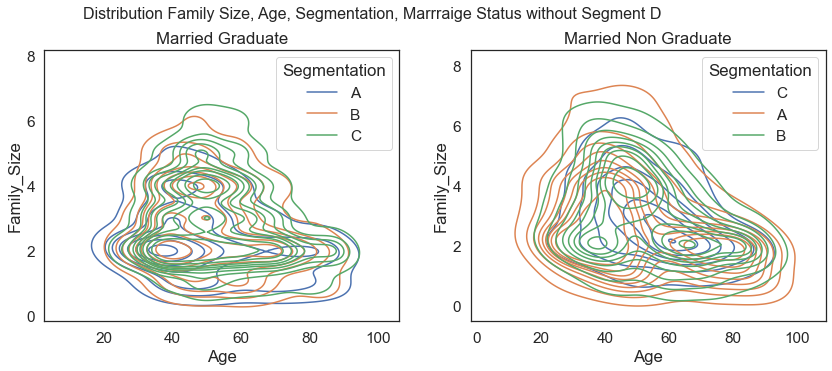

In [280]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5)) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status without Segment D', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Graduate') & (z['Segmentation']!='D') ])
plt.title('Married Graduate')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Non_Graduate') & (z['Segmentation']!='D')])
plt.title('Married Non Graduate')

plt.savefig("KDE Married Family Size.png")
 #There does appear to be some clear groupings here again this should be put forth

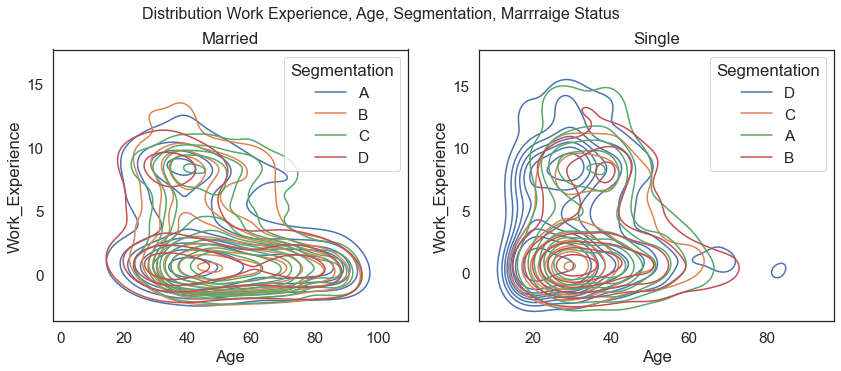

In [281]:
fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Work Experience, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")

Errr... We don't get much from looking at the segments with workplace yrs and age even though we know there should be. Does it get clearer if we dig deeper?

Nope. Well we are done with then onto age and family size

#### Additional Data Wrangling

Convert Spending Score to Ordinal, shrink data

In [282]:
file_name_path1 = os.path.join(basepath, sub_file, file1)
file_name_path2 = os.path.join(basepath, sub_file, file2)
train= pd.read_csv(file_name_path1)
test= pd.read_csv(file_name_path2)

#Remove rows with lots of missing
train= train.dropna(thresh=8)
train=train.dropna(subset=[n for n in train if (n != 'Work_Experience') | (n != 'Family_Size')], thresh=10)

train.info()

train = train[ train['Family_Size']<8]
#thrAt Family Size 7 and greater there are less than 3% of the people.So we eliminate them

#fill missing
print(train['Segmentation'].value_counts())
train['Ever_Married'] = train['Ever_Married'].fillna('zMissing')
train['Graduated'] = train['Graduated'].fillna('zMissing')
train['Profession'] = train['Profession'].fillna('zMissing')
train['Var_1'] = train['Var_1'].fillna('Cat_0')
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7909 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7909 non-null   int64  
 1   Gender           7909 non-null   object 
 2   Ever_Married     7806 non-null   object 
 3   Age              7909 non-null   int64  
 4   Graduated        7856 non-null   object 
 5   Profession       7825 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   7909 non-null   object 
 8   Family_Size      7669 non-null   float64
 9   Var_1            7856 non-null   object 
 10  Segmentation     7909 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 741.5+ KB
D    2053
C    1892
A    1843
B    1788
Name: Segmentation, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  

## Pre-Processing

In [283]:
#Spending Score change to Ordinals
train['Spending_Score'] = train['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
train['Spending_Score']=train['Spending_Score'].astype('int')
train['Segmentation']=train['Segmentation'].astype('category')
print(train.Segmentation.value_counts())
#Encode Var_1
train['Var_1']=train['Var_1'].apply(lambda x:x[-1])
train['Var_1']=train['Var_1'].astype('int')
train= train.drop(columns= ['MG'])

#shrink data where we can
#numerical_features = train.select_dtypes(include=['int32', 'int64','float64']).columns.tolist(
# items to be removed
#unwanted_num = {'ID', 'Segmentation'}
#numerical_features = [ele for ele in numerical_features if ele not in unwanted_num]
#numerical_features.remove('ID')
#print(numerical_features)

categorical_features = train.select_dtypes(exclude=['int32', 'int64','float64']).columns.tolist()
for col in categorical_features:
    train[col] = train[col].astype('category')
categorical_features.remove('Segmentation')
print(categorical_features)
print(train.info())
train.head()

D    2053
C    1892
A    1843
B    1788
Name: Segmentation, dtype: int64
['Gender', 'Ever_Married', 'Graduated', 'Profession']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               7576 non-null   int64   
 1   Gender           7576 non-null   category
 2   Ever_Married     7576 non-null   category
 3   Age              7576 non-null   int64   
 4   Graduated        7576 non-null   category
 5   Profession       7576 non-null   category
 6   Work_Experience  6874 non-null   float64 
 7   Spending_Score   7576 non-null   int32   
 8   Family_Size      7576 non-null   float64 
 9   Var_1            7576 non-null   int32   
 10  Segmentation     7576 non-null   category
dtypes: category(5), float64(2), int32(2), int64(2)
memory usage: 393.0 KB
None


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000,0,4.000,4,D
1,462643,Female,Yes,38,Yes,Engineer,nan,1,3.000,4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000,0,1.000,6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000,2,2.000,6,B
4,462669,Female,Yes,40,Yes,Entertainment,nan,2,6.000,6,A


In [348]:
#Train & Test Split
from sklearn.model_selection import train_test_split

label_col = 'Segmentation'
cat_cols =['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Spending_Score']
train_dummies=pd.get_dummies(train, prefix=cat_cols, columns=cat_cols, drop_first=True) 


df_train1, df_eval1 = train_test_split(train_dummies, test_size=0.25, random_state=314, shuffle=True, stratify=train[label_col])
all_colsz = df_train1.columns.tolist()
print(all_colsz)
feature_cols = df_train1.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')
df_train1.info()
X_train= df_train1.drop(columns= ['Segmentation', 'ID' ], axis=1)
X_test= df_eval1.drop(columns= ['Segmentation', 'ID' ], axis=1)
y_train= df_train1['Segmentation']
y_test= df_eval1['Segmentation']

print(X_train.info())


['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Male', 'Ever_Married_Yes', 'Ever_Married_zMissing', 'Graduated_Yes', 'Graduated_zMissing', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_zMissing', 'Var_1_1', 'Var_1_2', 'Var_1_3', 'Var_1_4', 'Var_1_5', 'Var_1_6', 'Var_1_7', 'Spending_Score_1', 'Spending_Score_2']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5682 entries, 2324 to 4726
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        5682 non-null   int64   
 1   Age                       5682 non-null   int64   
 2   Work_Experience           5147 non-null   float64 
 3   Family_Size               5682 non-null   float64 
 4   Segmentation              5682 non-null   category
 5   

### Chosing Scaler Standardization

##### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

##### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as noted earlier so no need for Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max scaler

In [285]:
#Things I'll need for Precossing
category_features = X_train.select_dtypes(include=['category']).columns.tolist()
print(category_features)
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print(numerical_features)

#Family size is a category since it is only whole numbers
cat_cols= ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Family_Size']
num_cols= ['Age', 'Work_Experience']

#Column Order
f1= numerical_features+categorical_features
diff_list = np.setdiff1d(feature_cols,f1).tolist()
f2= f1+diff_list #columns
print(f2)


[]
['Age', 'Work_Experience', 'Family_Size']
['Age', 'Work_Experience', 'Family_Size', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Ever_Married_Yes', 'Ever_Married_zMissing', 'Gender_Male', 'Graduated_Yes', 'Graduated_zMissing', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_zMissing', 'Spending_Score_1', 'Spending_Score_2', 'Var_1_1', 'Var_1_2', 'Var_1_3', 'Var_1_4', 'Var_1_5', 'Var_1_6', 'Var_1_7']


In [286]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearne.preprocessing import MinMaxScaler



#Scale and impute for numeric features
#We use median imputer because there are outliers for Age
numerical_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

#Categorical Features already turned to dummy features
ct_lgb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)],
        remainder='passthrough')


#ct_lgb = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numerical_features),
#        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')


X_train_lgb= ct_lgb.fit_transform(X_train)
X_test_lgb = ct_lgb.transform(X_test)

f2= X_train.columns.tolist() #get rid of if not ussing dummmies


#turn arrays back into dataframes
X_train_lgb = pd.DataFrame(X_train_lgb, columns=f2)
X_test_lgb  = pd.DataFrame(X_test_lgb, columns=f2)

In [356]:
df_train2, df_eval2 = train_test_split(train, test_size=0.25, random_state=314, shuffle=True, stratify=train[label_col])
X_train2= df_train2.drop(columns= ['Segmentation', 'ID' ], axis=1)

numerical_features2 = X_train2.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features2= X_train2.select_dtypes(exclude=['int64','float64']).columns.tolist()
col3 = numerical_features2 +categorical_features2
print(col3)
X_train2.info()

['Age', 'Work_Experience', 'Family_Size', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5682 entries, 2324 to 4726
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           5682 non-null   category
 1   Ever_Married     5682 non-null   category
 2   Age              5682 non-null   int64   
 3   Graduated        5682 non-null   category
 4   Profession       5682 non-null   category
 5   Work_Experience  5147 non-null   float64 
 6   Spending_Score   5682 non-null   int32   
 7   Family_Size      5682 non-null   float64 
 8   Var_1            5682 non-null   int32   
dtypes: category(4), float64(2), int32(2), int64(1)
memory usage: 244.8 KB


## Choose type of model

We are going to choose the type of model we will be going with first

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb ## gradient boost model


#metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score

#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
et_clf = ExtraTreesClassifier(max_depth=6)
rf_clf = RandomForestClassifier(max_depth=6)
lgb_clf =lgb.LGBMClassifier(max_depth=3, objective='multiclass')

# first check the accuracy score on without scalled features
#scoring_dic_accuracy = {}
#scoring_dic_f1 = {}
c_data= []

for clf in [log_clf, svc_clf, knn_clf, et_clf, rf_clf, lgb_clf]:
    clf.fit(X_train_lgb, y_train)
    
    pred = clf.predict(X_test_lgb)
    pred_train = clf.predict(X_train_lgb)
    ax= accuracy_score(y_test,pred)
    p = precision_score(y_test,pred, average='weighted')
    sn = clf.__class__.__name__
    sn = sn.replace('Classifier', '')
    cl = [sn, ax, p]
    c_data.append(cl)

score_columns= ['Algorithm',  'Accuracy Test',  'Precision Test']
#convert_dict = {'MAE Train': int, 'MAE Test': int} 
#score_tab = score_tab.astype(convert_dict) 
pd.options.display.float_format = '{:.3f}'.format
score_tab = pd.DataFrame(c_data, columns= score_columns )
score_tab.sort_values('Accuracy Test').reset_index(drop=True)


,Algorithm,Accuracy Test,Precision Test
0,KNeighbors,0.467,0.481
1,ExtraTrees,0.506,0.498
2,LogisticRegression,0.515,0.503
3,RandomForest,0.515,0.505
4,SVC,0.517,0.516
5,LGBM,0.522,0.511


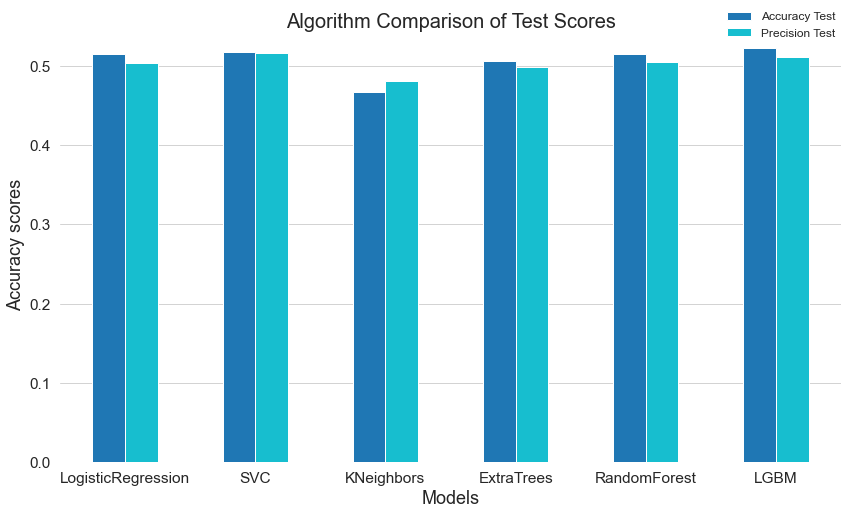

In [322]:

from matplotlib import cm
score_tab_MAE= score_tab[['Algorithm','Accuracy Test', 'Precision Test']].set_index('Algorithm')
cmap = cm.get_cmap('tab10') 

ax=score_tab_MAE.plot.bar(rot=0, figsize=(14,8), cmap=cmap )
sns.set_style(style='white')
sns.set(font_scale=1.4)
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:,.1f}'.format(y)))
ax.yaxis.grid(color= 'lightgrey') 


plt.title('Algorithm Comparison of Test Scores', fontsize=20, pad=0.1)
plt.legend(frameon= False, fontsize=12, bbox_to_anchor=(0.84, 0.95))
plt.box(on=None)
plt.xlabel('Models',fontsize=18)
plt.ylabel ('Accuracy scores',fontsize=18)


plt.savefig("Figx_ModelComparison.png")


### Results Model Comparison
* SVC had the best precision results (0.514).
* Light Gradient Boost had the best Average Accuracy results (0.522). It also has the second best Precision results 0.513

We ise Light Gradient Boost as our Model

## Model Building

We are going to start with a Random Forest Model,  light gradient Boosting Model


### LightGBM - Hypertuned

In [371]:


#Light GBM can handle cat_cols as long as they are ordinals and since they are a tree enseble min max scaling is
#pointless so...
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer

df_train2, df_eval2 = train_test_split(train, test_size=0.25, random_state=314, shuffle=True, stratify=train[label_col])
X_train2= df_train2.drop(columns= ['Segmentation', 'ID' ], axis=1)
X_test2= df_eval2.drop(columns= ['Segmentation', 'ID' ], axis=1)
print(X_train2.info())

#We use median imputer because these values have a skew
numerical_features2 = X_train2.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features2= X_train2.select_dtypes(exclude=['int64','float64']).columns.tolist()
col3 = numerical_features2 +categorical_features2

#Categorical Features Turn to Ordinal for LGBM processing
#Numerical Features use median imputer because these values have a skew
ct2 = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features2),
        ('cat', OrdinalEncoder(), categorical_features2)])

X_train2= ct2.fit_transform(X_train2)
X_test2 = ct2.transform(X_test2)

#turn arrays back into dataframes
X_train2 = pd.DataFrame(X_train2, columns=col3)
X_test2  = pd.DataFrame(X_test2, columns=col3)


import lightgbm as lgb ## gradient boost model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_log_error, mean_squared_error, roc_auc_score
from sklearn.metrics import accuracy_score, log_loss, precision_score

params = {}
params['random_state'] = 314
params['n_estimators'] = 300
params['objective'] = 'multiclass'
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.1

min_data_in_leafs = [30, 40, 50]
max_depth = [5, 6]

clf1 = lgb.LGBMClassifier(**params)
clf_grid = GridSearchCV(clf1, { 'min_data_in_leaf': min_data_in_leafs, 'max_depth': max_depth}
                        , cv=5, scoring='accuracy')
clf_grid.fit(X_train2, y_train, early_stopping_rounds=30, eval_set=[(X_train2, y_train), (X_test2, y_test)], eval_metric='multi_error', verbose=True)


# Predict on the test (and training) set to calculate metrics:
y_predict_train = clf_grid.predict(X_train2)
y_predict_test = clf_grid.predict(X_test2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5682 entries, 2324 to 4726
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           5682 non-null   category
 1   Ever_Married     5682 non-null   category
 2   Age              5682 non-null   int64   
 3   Graduated        5682 non-null   category
 4   Profession       5682 non-null   category
 5   Work_Experience  5147 non-null   float64 
 6   Spending_Score   5682 non-null   int32   
 7   Family_Size      5682 non-null   float64 
 8   Var_1            5682 non-null   int32   
dtypes: category(4), float64(2), int32(2), int64(1)
memory usage: 244.8 KB
None
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.524991	valid_

[58]	valid_0's multi_error: 0.412355	valid_0's multi_logloss: 0.961347	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.03886
[59]	valid_0's multi_error: 0.411651	valid_0's multi_logloss: 0.960107	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.03871
[60]	valid_0's multi_error: 0.410947	valid_0's multi_logloss: 0.959158	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.03853
[61]	valid_0's multi_error: 0.411299	valid_0's multi_logloss: 0.95837	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.03842
[62]	valid_0's multi_error: 0.411299	valid_0's multi_logloss: 0.957511	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.0386
[63]	valid_0's multi_error: 0.411475	valid_0's multi_logloss: 0.956562	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.03877
[64]	valid_0's multi_error: 0.410243	valid_0's multi_logloss: 0.955842	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.03864
[65]	valid_0's multi_error: 0.407955	valid_0's mul

[25]	valid_0's multi_error: 0.441746	valid_0's multi_logloss: 1.01858	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.05792
[26]	valid_0's multi_error: 0.43893	valid_0's multi_logloss: 1.01516	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.05629
[27]	valid_0's multi_error: 0.43717	valid_0's multi_logloss: 1.01264	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.05501
[28]	valid_0's multi_error: 0.436114	valid_0's multi_logloss: 1.01005	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.05337
[29]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.0069	valid_1's multi_error: 0.482577	valid_1's multi_logloss: 1.05204
[30]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.00457	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.05119
[31]	valid_0's multi_error: 0.431538	valid_0's multi_logloss: 1.00247	valid_1's multi_error: 0.483105	valid_1's multi_logloss: 1.05024
[32]	valid_0's multi_error: 0.431538	valid_0's multi_loglos

[59]	valid_0's multi_error: 0.407251	valid_0's multi_logloss: 0.962596	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.03958
[60]	valid_0's multi_error: 0.406723	valid_0's multi_logloss: 0.961618	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.03962
[61]	valid_0's multi_error: 0.407427	valid_0's multi_logloss: 0.96033	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.03975
[62]	valid_0's multi_error: 0.406723	valid_0's multi_logloss: 0.95935	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.03993
[63]	valid_0's multi_error: 0.404787	valid_0's multi_logloss: 0.957992	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.03942
Early stopping, best iteration is:
[33]	valid_0's multi_error: 0.428546	valid_0's multi_logloss: 1.00131	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04802
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy 

[53]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.969431	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.04603
[54]	valid_0's multi_error: 0.415523	valid_0's multi_logloss: 0.967581	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04614
[55]	valid_0's multi_error: 0.416051	valid_0's multi_logloss: 0.96667	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04604
[56]	valid_0's multi_error: 0.414995	valid_0's multi_logloss: 0.965548	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04588
[57]	valid_0's multi_error: 0.414995	valid_0's multi_logloss: 0.963909	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04607
[58]	valid_0's multi_error: 0.415699	valid_0's multi_logloss: 0.962569	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04574
[59]	valid_0's multi_error: 0.413059	valid_0's multi_logloss: 0.961494	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04607
[60]	valid_0's multi_error: 0.413411	valid_0's mu

[72]	valid_0's multi_error: 0.405315	valid_0's multi_logloss: 0.94635	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.03877
[73]	valid_0's multi_error: 0.403555	valid_0's multi_logloss: 0.945378	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.03916
Early stopping, best iteration is:
[43]	valid_0's multi_error: 0.421331	valid_0's multi_logloss: 0.980491	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04246
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.520415	valid_0's multi_logloss: 1.32696	valid_1's multi_error: 0.526927	valid_1's multi_logloss: 1.33012
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.480113	valid_0's multi_logloss: 1.28239	valid_1's multi_error: 0.487856	valid_1's 

[60]	valid_0's multi_error: 0.414467	valid_0's multi_logloss: 0.965302	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04309
[61]	valid_0's multi_error: 0.414115	valid_0's multi_logloss: 0.964431	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04311
[62]	valid_0's multi_error: 0.413059	valid_0's multi_logloss: 0.963672	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04328
[63]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.962758	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04314
[64]	valid_0's multi_error: 0.413587	valid_0's multi_logloss: 0.961959	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.04343
[65]	valid_0's multi_error: 0.411299	valid_0's multi_logloss: 0.961037	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04329
[66]	valid_0's multi_error: 0.412179	valid_0's multi_logloss: 0.960219	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.0435
[67]	valid_0's multi_error: 0.412003	valid_0's mu

[51]	valid_0's multi_error: 0.415523	valid_0's multi_logloss: 0.973449	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.04227
[52]	valid_0's multi_error: 0.413235	valid_0's multi_logloss: 0.972455	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04191
[53]	valid_0's multi_error: 0.414115	valid_0's multi_logloss: 0.970934	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04193
[54]	valid_0's multi_error: 0.413059	valid_0's multi_logloss: 0.970074	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04193
[55]	valid_0's multi_error: 0.412003	valid_0's multi_logloss: 0.968939	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.04172
[56]	valid_0's multi_error: 0.411475	valid_0's multi_logloss: 0.96803	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04206
[57]	valid_0's multi_error: 0.410771	valid_0's multi_logloss: 0.966955	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04215
[58]	valid_0's multi_error: 0.408659	valid_0's mu

[46]	valid_0's multi_error: 0.418339	valid_0's multi_logloss: 0.984642	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.04439
[47]	valid_0's multi_error: 0.419219	valid_0's multi_logloss: 0.983282	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.04371
[48]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.98201	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04325
[49]	valid_0's multi_error: 0.417635	valid_0's multi_logloss: 0.980918	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.04319
[50]	valid_0's multi_error: 0.416579	valid_0's multi_logloss: 0.97931	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04245
[51]	valid_0's multi_error: 0.416403	valid_0's multi_logloss: 0.978026	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04198
[52]	valid_0's multi_error: 0.415875	valid_0's multi_logloss: 0.976815	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04164
[53]	valid_0's multi_error: 0.415523	valid_0's mul

[36]	valid_0's multi_error: 0.428018	valid_0's multi_logloss: 0.997458	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05226
[37]	valid_0's multi_error: 0.427314	valid_0's multi_logloss: 0.995131	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.05156
[38]	valid_0's multi_error: 0.42749	valid_0's multi_logloss: 0.993124	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.05066
[39]	valid_0's multi_error: 0.426786	valid_0's multi_logloss: 0.991356	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05019
[40]	valid_0's multi_error: 0.425554	valid_0's multi_logloss: 0.989451	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05012
Early stopping, best iteration is:
[10]	valid_0's multi_error: 0.453713	valid_0's multi_logloss: 1.10649	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.12584
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Accuracy

[9]	valid_0's multi_error: 0.460753	valid_0's multi_logloss: 1.12432	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.13656
[10]	valid_0's multi_error: 0.458465	valid_0's multi_logloss: 1.1131	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.12685
[11]	valid_0's multi_error: 0.456177	valid_0's multi_logloss: 1.10273	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.11813
[12]	valid_0's multi_error: 0.457409	valid_0's multi_logloss: 1.09404	valid_1's multi_error: 0.478881	valid_1's multi_logloss: 1.10992
[13]	valid_0's multi_error: 0.455297	valid_0's multi_logloss: 1.08567	valid_1's multi_error: 0.477825	valid_1's multi_logloss: 1.10263
[14]	valid_0's multi_error: 0.454417	valid_0's multi_logloss: 1.07871	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.09699
[15]	valid_0's multi_error: 0.451602	valid_0's multi_logloss: 1.07187	valid_1's multi_error: 0.478881	valid_1's multi_logloss: 1.09171
[16]	valid_0's multi_error: 0.448962	valid_0's multi_logl

[25]	valid_0's multi_error: 0.439106	valid_0's multi_logloss: 1.02957	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.06359
[26]	valid_0's multi_error: 0.436994	valid_0's multi_logloss: 1.02692	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.06201
[27]	valid_0's multi_error: 0.435762	valid_0's multi_logloss: 1.02428	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.06046
[28]	valid_0's multi_error: 0.434706	valid_0's multi_logloss: 1.0215	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.05907
[29]	valid_0's multi_error: 0.433474	valid_0's multi_logloss: 1.0193	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.05844
[30]	valid_0's multi_error: 0.434002	valid_0's multi_logloss: 1.01697	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.05787
[31]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.01497	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.05727
[32]	valid_0's multi_error: 0.429954	valid_0's multi_logl

[50]	valid_0's multi_error: 0.417987	valid_0's multi_logloss: 0.980799	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04311
[51]	valid_0's multi_error: 0.417811	valid_0's multi_logloss: 0.980052	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04279
[52]	valid_0's multi_error: 0.416051	valid_0's multi_logloss: 0.97876	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04248
[53]	valid_0's multi_error: 0.415347	valid_0's multi_logloss: 0.977137	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.04178
[54]	valid_0's multi_error: 0.415347	valid_0's multi_logloss: 0.975971	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04147
[55]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.974803	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.04112
[56]	valid_0's multi_error: 0.411827	valid_0's multi_logloss: 0.973523	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04132
[57]	valid_0's multi_error: 0.412707	valid_0's mu

[55]	valid_0's multi_error: 0.418515	valid_0's multi_logloss: 0.976089	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05132
[56]	valid_0's multi_error: 0.416755	valid_0's multi_logloss: 0.974881	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.05127
[57]	valid_0's multi_error: 0.415699	valid_0's multi_logloss: 0.97377	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.05162
[58]	valid_0's multi_error: 0.416931	valid_0's multi_logloss: 0.972887	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.05171
[59]	valid_0's multi_error: 0.415875	valid_0's multi_logloss: 0.971857	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.05143
[60]	valid_0's multi_error: 0.416579	valid_0's multi_logloss: 0.970895	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05116
Early stopping, best iteration is:
[30]	valid_0's multi_error: 0.436642	valid_0's multi_logloss: 1.01562	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.06197
[LightGBM] [War

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.487856	valid_0's multi_logloss: 1.32423	valid_1's multi_error: 0.51056	valid_1's multi_logloss: 1.32857
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.463217	valid_0's multi_logloss: 1.27641	valid_1's multi_error: 0.487328	valid_1's multi_logloss: 1.28361
[3]	valid_0's multi_error: 0.449842	valid_0's multi_logloss: 1.23673	valid_1's multi_error: 0.487856	valid_1's multi_logloss: 1.24713
[4]	valid_0's multi_error: 0.449138	valid_0's multi_logloss: 1.20554	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.21821
[5]	valid_0's multi_error: 0.448434	valid_0's multi_logloss: 1.17969	valid_1's multi_error: 0.479409	valid_1's multi_logloss: 1.1935
[6]	valid_0's multi

[21]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.01833	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.06566
[22]	valid_0's multi_error: 0.43189	valid_0's multi_logloss: 1.014	valid_1's multi_error: 0.488912	valid_1's multi_logloss: 1.06374
[23]	valid_0's multi_error: 0.43013	valid_0's multi_logloss: 1.01007	valid_1's multi_error: 0.486272	valid_1's multi_logloss: 1.06176
[24]	valid_0's multi_error: 0.427314	valid_0's multi_logloss: 1.00637	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.05996
[25]	valid_0's multi_error: 0.42661	valid_0's multi_logloss: 1.00268	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.05878
[26]	valid_0's multi_error: 0.424674	valid_0's multi_logloss: 0.99892	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.05673
[27]	valid_0's multi_error: 0.422386	valid_0's multi_logloss: 0.996049	valid_1's multi_error: 0.483105	valid_1's multi_logloss: 1.05552
[28]	valid_0's multi_error: 0.419923	valid_0's multi_loglos

[60]	valid_0's multi_error: 0.392819	valid_0's multi_logloss: 0.935322	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04191
[61]	valid_0's multi_error: 0.392995	valid_0's multi_logloss: 0.933678	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.042
[62]	valid_0's multi_error: 0.392115	valid_0's multi_logloss: 0.932322	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.0419
[63]	valid_0's multi_error: 0.390532	valid_0's multi_logloss: 0.930712	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.0419
[64]	valid_0's multi_error: 0.389828	valid_0's multi_logloss: 0.929592	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04181
[65]	valid_0's multi_error: 0.389652	valid_0's multi_logloss: 0.928152	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04162
[66]	valid_0's multi_error: 0.3893	valid_0's multi_logloss: 0.927473	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04147
[67]	valid_0's multi_error: 0.387892	valid_0's multi_l

[44]	valid_0's multi_error: 0.407427	valid_0's multi_logloss: 0.956908	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.0481
[45]	valid_0's multi_error: 0.408131	valid_0's multi_logloss: 0.955513	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.04801
[46]	valid_0's multi_error: 0.408835	valid_0's multi_logloss: 0.953811	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.04835
[47]	valid_0's multi_error: 0.408483	valid_0's multi_logloss: 0.952079	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.04796
[48]	valid_0's multi_error: 0.406547	valid_0's multi_logloss: 0.950257	valid_1's multi_error: 0.477825	valid_1's multi_logloss: 1.04833
[49]	valid_0's multi_error: 0.406019	valid_0's multi_logloss: 0.94904	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.04861
Early stopping, best iteration is:
[19]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.02927	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.07564
[LightGBM] [Warn

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.491904	valid_0's multi_logloss: 1.32471	valid_1's multi_error: 0.515312	valid_1's multi_logloss: 1.3295
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.475009	valid_0's multi_logloss: 1.27817	valid_1's multi_error: 0.496304	valid_1's multi_logloss: 1.28441
[3]	valid_0's multi_error: 0.459697	valid_0's multi_logloss: 1.24011	valid_1's multi_error: 0.4868	valid_1's multi_logloss: 1.24928
[4]	valid_0's multi_error: 0.451426	valid_0's multi_logloss: 1.20871	valid_1's multi_error: 0.484688	valid_1's multi_logloss: 1.21976
[5]	valid_0's multi_error: 0.44949	valid_0's multi_logloss: 1.18272	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.19571
[6]	valid_0's multi_e

[2]	valid_0's multi_error: 0.464449	valid_0's multi_logloss: 1.27727	valid_1's multi_error: 0.49472	valid_1's multi_logloss: 1.28421
[3]	valid_0's multi_error: 0.453537	valid_0's multi_logloss: 1.23981	valid_1's multi_error: 0.49208	valid_1's multi_logloss: 1.24969
[4]	valid_0's multi_error: 0.452306	valid_0's multi_logloss: 1.20766	valid_1's multi_error: 0.4868	valid_1's multi_logloss: 1.22024
[5]	valid_0's multi_error: 0.448962	valid_0's multi_logloss: 1.18066	valid_1's multi_error: 0.484688	valid_1's multi_logloss: 1.1955
[6]	valid_0's multi_error: 0.44685	valid_0's multi_logloss: 1.15871	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.17521
[7]	valid_0's multi_error: 0.444914	valid_0's multi_logloss: 1.14005	valid_1's multi_error: 0.486272	valid_1's multi_logloss: 1.15885
[8]	valid_0's multi_error: 0.444914	valid_0's multi_logloss: 1.12418	valid_1's multi_error: 0.479409	valid_1's multi_logloss: 1.14434
[9]	valid_0's multi_error: 0.44861	valid_0's multi_logloss: 1.11012	

[67]	valid_0's multi_error: 0.391939	valid_0's multi_logloss: 0.933509	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.04551
[68]	valid_0's multi_error: 0.391059	valid_0's multi_logloss: 0.932705	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04528
[69]	valid_0's multi_error: 0.390883	valid_0's multi_logloss: 0.931906	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04564
[70]	valid_0's multi_error: 0.390356	valid_0's multi_logloss: 0.930797	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04581
[71]	valid_0's multi_error: 0.390883	valid_0's multi_logloss: 0.929897	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04627
[72]	valid_0's multi_error: 0.389828	valid_0's multi_logloss: 0.929227	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04633
[73]	valid_0's multi_error: 0.388596	valid_0's multi_logloss: 0.928156	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04654
[74]	valid_0's multi_error: 0.3893	valid_0's mul

[30]	valid_0's multi_error: 0.424322	valid_0's multi_logloss: 0.997611	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.04989
[31]	valid_0's multi_error: 0.421683	valid_0's multi_logloss: 0.995621	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.04921
[32]	valid_0's multi_error: 0.420627	valid_0's multi_logloss: 0.992618	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.04804
[33]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.990626	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.04752
[34]	valid_0's multi_error: 0.419043	valid_0's multi_logloss: 0.987562	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04566
[35]	valid_0's multi_error: 0.418691	valid_0's multi_logloss: 0.985567	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.04487
[36]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.982888	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04363
[37]	valid_0's multi_error: 0.416403	valid_0's m

[6]	valid_0's multi_error: 0.454241	valid_0's multi_logloss: 1.16099	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.17826
[7]	valid_0's multi_error: 0.452834	valid_0's multi_logloss: 1.14178	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.16142
[8]	valid_0's multi_error: 0.450898	valid_0's multi_logloss: 1.12482	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.14643
[9]	valid_0's multi_error: 0.45037	valid_0's multi_logloss: 1.11014	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.13347
[10]	valid_0's multi_error: 0.447554	valid_0's multi_logloss: 1.09808	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.12274
[11]	valid_0's multi_error: 0.448962	valid_0's multi_logloss: 1.08777	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.11365
[12]	valid_0's multi_error: 0.445442	valid_0's multi_logloss: 1.0788	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.10607
[13]	valid_0's multi_error: 0.44509	valid_0's multi_logloss: 

[13]	valid_0's multi_error: 0.43893	valid_0's multi_logloss: 1.06895	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.0987
[14]	valid_0's multi_error: 0.43893	valid_0's multi_logloss: 1.06109	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.09219
[15]	valid_0's multi_error: 0.43805	valid_0's multi_logloss: 1.05361	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.08661
[16]	valid_0's multi_error: 0.436818	valid_0's multi_logloss: 1.04692	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.08162
[17]	valid_0's multi_error: 0.43541	valid_0's multi_logloss: 1.04115	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.07727
[18]	valid_0's multi_error: 0.434354	valid_0's multi_logloss: 1.03565	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.07361
[19]	valid_0's multi_error: 0.430482	valid_0's multi_logloss: 1.03077	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.07055
[20]	valid_0's multi_error: 0.430658	valid_0's multi_logloss

[17]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.04761	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.08031
[18]	valid_0's multi_error: 0.434706	valid_0's multi_logloss: 1.04209	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.07717
[19]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.0368	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.07388
[20]	valid_0's multi_error: 0.43189	valid_0's multi_logloss: 1.03228	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.07125
[21]	valid_0's multi_error: 0.431186	valid_0's multi_logloss: 1.02839	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.06937
[22]	valid_0's multi_error: 0.431714	valid_0's multi_logloss: 1.02431	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.06723
[23]	valid_0's multi_error: 0.430306	valid_0's multi_logloss: 1.02059	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.06531
[24]	valid_0's multi_error: 0.429954	valid_0's multi_logl

[32]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.995088	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.05644
[33]	valid_0's multi_error: 0.421507	valid_0's multi_logloss: 0.993094	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05574
[34]	valid_0's multi_error: 0.420451	valid_0's multi_logloss: 0.99047	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05486
[35]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.988758	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05421
[36]	valid_0's multi_error: 0.419395	valid_0's multi_logloss: 0.987063	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.05385
[37]	valid_0's multi_error: 0.417811	valid_0's multi_logloss: 0.985123	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05358
[38]	valid_0's multi_error: 0.416755	valid_0's multi_logloss: 0.982956	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05357
[39]	valid_0's multi_error: 0.416931	valid_0's mu

[19]	valid_0's multi_error: 0.441042	valid_0's multi_logloss: 1.04264	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.0722
[20]	valid_0's multi_error: 0.44245	valid_0's multi_logloss: 1.03873	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.06942
[21]	valid_0's multi_error: 0.441042	valid_0's multi_logloss: 1.03486	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.06716
[22]	valid_0's multi_error: 0.440338	valid_0's multi_logloss: 1.03143	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.06499
[23]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.02724	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.06284
[24]	valid_0's multi_error: 0.435762	valid_0's multi_logloss: 1.02317	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.0609
[25]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.0195	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.05884
[26]	valid_0's multi_error: 0.432946	valid_0's multi_loglos

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.50352	valid_0's multi_logloss: 1.32592	valid_1's multi_error: 0.510032	valid_1's multi_logloss: 1.32857
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.470609	valid_0's multi_logloss: 1.27994	valid_1's multi_error: 0.488912	valid_1's multi_logloss: 1.28589
[3]	valid_0's multi_error: 0.464625	valid_0's multi_logloss: 1.24281	valid_1's multi_error: 0.479409	valid_1's multi_logloss: 1.25178
[4]	valid_0's multi_error: 0.463569	valid_0's multi_logloss: 1.21231	valid_1's multi_error: 0.476769	valid_1's multi_logloss: 1.22363
[5]	valid_0's multi_error: 0.460577	valid_0's multi_logloss: 1.18683	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.19997
[6]	valid_0's mult

[64]	valid_0's multi_error: 0.403203	valid_0's multi_logloss: 0.945753	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04873
[65]	valid_0's multi_error: 0.401443	valid_0's multi_logloss: 0.944607	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.0487
[66]	valid_0's multi_error: 0.401971	valid_0's multi_logloss: 0.943564	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04846
[67]	valid_0's multi_error: 0.399155	valid_0's multi_logloss: 0.942583	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.04899
[68]	valid_0's multi_error: 0.398979	valid_0's multi_logloss: 0.94161	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04903
[69]	valid_0's multi_error: 0.398979	valid_0's multi_logloss: 0.940531	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04948
[70]	valid_0's multi_error: 0.398979	valid_0's multi_logloss: 0.939299	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.04958
[71]	valid_0's multi_error: 0.398979	valid_0's mul

[10]	training's multi_error: 0.451074	training's multi_logloss: 1.10353	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.12031
[11]	training's multi_error: 0.449666	training's multi_logloss: 1.09177	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.11034
[12]	training's multi_error: 0.448082	training's multi_logloss: 1.08286	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.10258
[13]	training's multi_error: 0.446498	training's multi_logloss: 1.07368	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.09526
[14]	training's multi_error: 0.446674	training's multi_logloss: 1.06582	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.0885
[15]	training's multi_error: 0.44509	training's multi_logloss: 1.05911	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.08325
[16]	training's multi_error: 0.444914	training's multi_logloss: 1.0531	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.07896
[17]	training's multi_error: 0.442802	traini

[74]	training's multi_error: 0.395107	training's multi_logloss: 0.928917	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.03309
[75]	training's multi_error: 0.394931	training's multi_logloss: 0.92806	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.03291
Early stopping, best iteration is:
[45]	training's multi_error: 0.414467	training's multi_logloss: 0.965257	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.03443


In [419]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, max_features, and max_depth: \n')
print(clf_grid.best_params_, clf_grid.best_score_)

auc_lgbh= accuracy_score(y_test, y_predict_test)
prec_lgbh= precision_score(y_test, y_predict_test, average='weighted')
n_lgbh= 'LGB with Hypertuned Parameters (HP)'
cl_lgbh = [n_lgbh, auc_lgbh, prec_lgbh]
print('For {} average accuracy is {:.4f} and average precision is {:.4f}'.format(n_lgbh, auc_lgbh, prec_lgbh))


print("\n[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

Best parameters for n_estimators, max_features, and max_depth: 

{'max_depth': 5, 'min_data_in_leaf': 30} 0.5320284725061007
For LGB with Hypertuned Parameters (HP) average accuracy is 0.5359 and average precision is 0.5259

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.52      0.54      0.53      1382
           B       0.52      0.39      0.44      1341
           C       0.61      0.63      0.62      1419
           D       0.65      0.77      0.70      1540

    accuracy                           0.59      5682
   macro avg       0.58      0.58      0.57      5682
weighted avg       0.58      0.59      0.58      5682

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.44      0.46      0.45       461
           B       0.43      0.33      0.37       447
           C       0.58      0.59      0.59       473
           D       0.64      0.74      0.68       513

    

Accuracy of LGB Classifier 53.59


KeyboardInterrupt: 

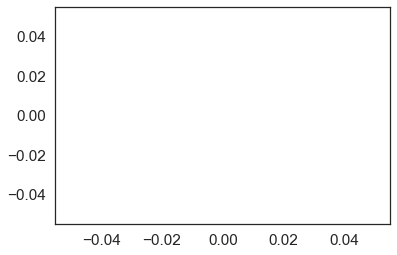

In [418]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_lgb = clf_grid.predict_proba(X_test2)
auc_lgb= accuracy_score(y_test, y_predict_test)
print("Accuracy of LGB Classifier {:.2f}".format( accuracy_score(y_test, y_predict_test) * 100))
data = []
dic_lgbg = {}
dict_auc_lgbg = {}
classes = ['A', 'B', 'C', 'D']
for i in range(len(classes)):
    y_score_lgb = proba_lgb[:,i]
    cl_i = classes[i]
    prec_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_score_lgb, pos_label=cl_i)
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_score_lgb, pos_label=cl_i)
    a1= zip(prec_lgb, recall_lgb, fpr_lgb, tpr_lgb)
    df2= pd.DataFrame(a1, columns=['prec', 'recall', 'False Positive Rate', 'True Positive Rate'])
    df2['Classes'] = classes[i]
    dic_lgbg[cl_i] = df2
    auc = roc_auc_score(y_test==cl_i,y_predict_test==cl_i)
    dict_auc_lgbg[cl_i] = auc 
df_lgbg= dic_lgbg['D'].append([dic_lgbg['B'], dic_lgbg['C'], dic_lgbg['A']])
sns.lineplot(x = 'False Positive Rate', y = 'True Positive Rate', data=df_lgbg, hue='Classes')
plt.title('ROC AUC Curve by Class for LGB Hypertuned (HP)')
for i in range(len(classes)):
    cl_i = classes[i]
    print('ROC AUC score for class {} is {:.2f}'.format(cl_i, dict_auc_lgbg[cl_i]))


In [ ]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')
g= plot_confusion_matrix(clf_grid, X_test2, y_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')
g.ax_.set_title('Light Gradient Boosting Confusion Matrix')


Category B is often miscategorized as C this the largest error point

### Iterative 1  Boosting Sampling Sampling:

In [450]:
params['min_data_in_leaf'] =clf_grid.best_params_['min_data_in_leaf']
params['max_depth'] = clf_grid.best_params_['max_depth']
params['boosting_type'] = 'gbdt'
params['colsample_bytree']=0.65


sub_samples =[0.6, 0.5, 0.7] # of samples (0.2 not 0.6)
subsample_freqs = [6, 12, 18] #Every so Rows

    
clf2 = lgb.LGBMClassifier(**params)
gs_grid = GridSearchCV(clf2, {'subsample': sub_samples, 'subsample_freq': subsample_freqs}
                        , cv=5, scoring='accuracy')
gs_grid.fit(X_train2, y_train, early_stopping_rounds=30, eval_set=[(X_train2, y_train), (X_test2, y_test)], eval_metric='multi_error', verbose=True)


# Predict on the test (and training) set to calculate metrics:
y_train_gs = gs_grid.predict(X_train2)
y_test_gs = gs_grid.predict(X_test2)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.536783	valid_0's multi_logloss: 1.33446	valid_1's multi_error: 0.540127	valid_1's multi_logloss: 1.33716
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.494368	valid_0's multi_logloss: 1.2947	valid_1's multi_error: 0.495248	valid_1's multi_logloss: 1.29928
[3]	valid_0's multi_error: 0.480465	valid_0's multi_logloss: 1.26094	valid_1's multi_error: 0.484688	valid_1's multi_logloss: 1.26675
[4]	valid_0's multi_error: 0.480641	valid_0's multi_logloss: 1.23348	valid_1's multi_error: 0.492608	valid_1's multi_logloss: 1.24041
[5]	valid_0's multi_error: 0.476065	valid_0's multi_logloss: 1.2083	valid_1's multi_error: 0.493664	valid_1's multi_logloss: 1.21662
[6]	valid_0's multi

[62]	valid_0's multi_error: 0.42397	valid_0's multi_logloss: 0.986776	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.05175
[63]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.985876	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.05159
[64]	valid_0's multi_error: 0.422562	valid_0's multi_logloss: 0.985104	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.05218
[65]	valid_0's multi_error: 0.422386	valid_0's multi_logloss: 0.984349	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.0525
[66]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.983308	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05241
[67]	valid_0's multi_error: 0.420627	valid_0's multi_logloss: 0.982264	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05168
[68]	valid_0's multi_error: 0.420627	valid_0's multi_logloss: 0.981492	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05121
[69]	valid_0's multi_error: 0.419923	valid_0's mul

[9]	valid_0's multi_error: 0.456353	valid_0's multi_logloss: 1.13984	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.15527
[10]	valid_0's multi_error: 0.455121	valid_0's multi_logloss: 1.12782	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.14404
[11]	valid_0's multi_error: 0.453889	valid_0's multi_logloss: 1.1177	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.13469
[12]	valid_0's multi_error: 0.452306	valid_0's multi_logloss: 1.10787	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.12525
[13]	valid_0's multi_error: 0.451602	valid_0's multi_logloss: 1.09951	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.11809
[14]	valid_0's multi_error: 0.448962	valid_0's multi_logloss: 1.09089	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.11029
[15]	valid_0's multi_error: 0.44773	valid_0's multi_logloss: 1.08412	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.10463
[16]	valid_0's multi_error: 0.445266	valid_0's multi_loglo

[77]	valid_0's multi_error: 0.410771	valid_0's multi_logloss: 0.972718	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04938
[78]	valid_0's multi_error: 0.410419	valid_0's multi_logloss: 0.971635	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04874
[79]	valid_0's multi_error: 0.410771	valid_0's multi_logloss: 0.97072	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04848
[80]	valid_0's multi_error: 0.409891	valid_0's multi_logloss: 0.970019	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.0482
[81]	valid_0's multi_error: 0.408835	valid_0's multi_logloss: 0.96873	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04732
[82]	valid_0's multi_error: 0.408835	valid_0's multi_logloss: 0.967971	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04679
[83]	valid_0's multi_error: 0.407075	valid_0's multi_logloss: 0.967386	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04649
[84]	valid_0's multi_error: 0.406019	valid_0's mult

[59]	valid_0's multi_error: 0.420451	valid_0's multi_logloss: 0.986752	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04147
[60]	valid_0's multi_error: 0.419043	valid_0's multi_logloss: 0.986085	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04164
[61]	valid_0's multi_error: 0.419219	valid_0's multi_logloss: 0.98462	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04193
Early stopping, best iteration is:
[31]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.02697	valid_1's multi_error: 0.457761	valid_1's multi_logloss: 1.05844
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.546287	valid_0's multi_logloss: 1.33372	valid_1's multi_error: 0.553326	valid_1's multi_logloss: 1.33679
Training until validation scores don't

[67]	valid_0's multi_error: 0.415523	valid_0's multi_logloss: 0.980892	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.0504
[68]	valid_0's multi_error: 0.414291	valid_0's multi_logloss: 0.98015	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05026
[69]	valid_0's multi_error: 0.413411	valid_0's multi_logloss: 0.979778	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05037
[70]	valid_0's multi_error: 0.412179	valid_0's multi_logloss: 0.979274	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05038
[71]	valid_0's multi_error: 0.412355	valid_0's multi_logloss: 0.978658	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05006
[72]	valid_0's multi_error: 0.410595	valid_0's multi_logloss: 0.977676	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.05005
[73]	valid_0's multi_error: 0.410419	valid_0's multi_logloss: 0.97695	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.05007
[74]	valid_0's multi_error: 0.409891	valid_0's mult

[47]	valid_0's multi_error: 0.42837	valid_0's multi_logloss: 0.999681	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04728
[48]	valid_0's multi_error: 0.427666	valid_0's multi_logloss: 0.998085	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.0462
[49]	valid_0's multi_error: 0.426962	valid_0's multi_logloss: 0.996813	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04595
[50]	valid_0's multi_error: 0.426082	valid_0's multi_logloss: 0.995048	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.0459
[51]	valid_0's multi_error: 0.424498	valid_0's multi_logloss: 0.993806	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04529
[52]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.992762	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04551
[53]	valid_0's multi_error: 0.424498	valid_0's multi_logloss: 0.991796	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04568
[54]	valid_0's multi_error: 0.424146	valid_0's mult

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.548222	valid_0's multi_logloss: 1.33358	valid_1's multi_error: 0.550686	valid_1's multi_logloss: 1.33689
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.490848	valid_0's multi_logloss: 1.29417	valid_1's multi_error: 0.500528	valid_1's multi_logloss: 1.29921
[3]	valid_0's multi_error: 0.470081	valid_0's multi_logloss: 1.25913	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.26595
[4]	valid_0's multi_error: 0.464977	valid_0's multi_logloss: 1.23182	valid_1's multi_error: 0.48944	valid_1's multi_logloss: 1.23973
[5]	valid_0's multi_error: 0.468321	valid_0's multi_logloss: 1.20669	valid_1's multi_error: 0.485744	valid_1's multi_logloss: 1.21646
[6]	valid_0's mult

[73]	valid_0's multi_error: 0.418515	valid_0's multi_logloss: 0.978249	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.05082
[74]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.977396	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.05031
[75]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.97668	valid_1's multi_error: 0.477825	valid_1's multi_logloss: 1.04975
[76]	valid_0's multi_error: 0.416931	valid_0's multi_logloss: 0.975548	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.04994
[77]	valid_0's multi_error: 0.417987	valid_0's multi_logloss: 0.974823	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.04942
[78]	valid_0's multi_error: 0.416227	valid_0's multi_logloss: 0.97421	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.04909
[79]	valid_0's multi_error: 0.413763	valid_0's multi_logloss: 0.973274	valid_1's multi_error: 0.475713	valid_1's multi_logloss: 1.04885
[80]	valid_0's multi_error: 0.415171	valid_0's mul

[56]	valid_0's multi_error: 0.423618	valid_0's multi_logloss: 0.992817	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.0448
[57]	valid_0's multi_error: 0.423442	valid_0's multi_logloss: 0.991704	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04417
[58]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.991167	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04401
[59]	valid_0's multi_error: 0.424674	valid_0's multi_logloss: 0.990364	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04363
[60]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.989927	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04356
[61]	valid_0's multi_error: 0.424322	valid_0's multi_logloss: 0.988453	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04348
[62]	valid_0's multi_error: 0.422562	valid_0's multi_logloss: 0.987191	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04352
[63]	valid_0's multi_error: 0.422562	valid_0's mul

[54]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 0.994655	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.0519
[55]	valid_0's multi_error: 0.429778	valid_0's multi_logloss: 0.993573	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.05171
[56]	valid_0's multi_error: 0.431186	valid_0's multi_logloss: 0.992287	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.05136
[57]	valid_0's multi_error: 0.428546	valid_0's multi_logloss: 0.991087	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05096
[58]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 0.99055	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05128
[59]	valid_0's multi_error: 0.427842	valid_0's multi_logloss: 0.989463	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.05085
[60]	valid_0's multi_error: 0.42661	valid_0's multi_logloss: 0.988516	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05082
[61]	valid_0's multi_error: 0.425906	valid_0's mult

[52]	valid_0's multi_error: 0.423618	valid_0's multi_logloss: 0.996362	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.04439
[53]	valid_0's multi_error: 0.423794	valid_0's multi_logloss: 0.995459	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04426
[54]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.994481	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.0439
[55]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.993349	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.04376
[56]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.992256	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.04355
[57]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.991282	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04348
[58]	valid_0's multi_error: 0.424322	valid_0's multi_logloss: 0.990541	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.04339
[59]	valid_0's multi_error: 0.424322	valid_0's mu

[50]	valid_0's multi_error: 0.429426	valid_0's multi_logloss: 1.00145	valid_1's multi_error: 0.481521	valid_1's multi_logloss: 1.05822
[51]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 1.00084	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.05827
[52]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 0.999952	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.05801
[53]	valid_0's multi_error: 0.430306	valid_0's multi_logloss: 0.999486	valid_1's multi_error: 0.478881	valid_1's multi_logloss: 1.05845
[54]	valid_0's multi_error: 0.428722	valid_0's multi_logloss: 0.998555	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.05813
[55]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 0.997	valid_1's multi_error: 0.477825	valid_1's multi_logloss: 1.05777
[56]	valid_0's multi_error: 0.426962	valid_0's multi_logloss: 0.995298	valid_1's multi_error: 0.479409	valid_1's multi_logloss: 1.05717
[57]	valid_0's multi_error: 0.425554	valid_0's multi_

[56]	valid_0's multi_error: 0.420803	valid_0's multi_logloss: 0.990087	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.052
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.442274	valid_0's multi_logloss: 1.03848	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.07427
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.541711	valid_0's multi_logloss: 1.33492	valid_1's multi_error: 0.544351	valid_1's multi_logloss: 1.33738
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.496656	valid_0's multi_logloss: 1.29672	valid_1's multi_error: 0.502112	valid_1's multi_logloss: 1.30018
[3]	valid_0's multi_error: 0.482577	valid_0's multi_logloss: 1.26262	valid_1's multi_error: 0.491024	valid_1's mult

[70]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.981424	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04413
[71]	valid_0's multi_error: 0.423794	valid_0's multi_logloss: 0.980972	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04383
[72]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.980445	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04409
[73]	valid_0's multi_error: 0.423618	valid_0's multi_logloss: 0.979536	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04355
[74]	valid_0's multi_error: 0.42397	valid_0's multi_logloss: 0.978719	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04254
[75]	valid_0's multi_error: 0.422386	valid_0's multi_logloss: 0.977756	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04183
[76]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.97698	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.04131
[77]	valid_0's multi_error: 0.420979	valid_0's mult

[53]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.996864	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.06055
[54]	valid_0's multi_error: 0.425378	valid_0's multi_logloss: 0.99605	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.06047
[55]	valid_0's multi_error: 0.42397	valid_0's multi_logloss: 0.994499	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05934
[56]	valid_0's multi_error: 0.424498	valid_0's multi_logloss: 0.993221	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.05874
[57]	valid_0's multi_error: 0.423794	valid_0's multi_logloss: 0.992434	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05845
[58]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.991679	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.0578
[59]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.990696	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05741
[60]	valid_0's multi_error: 0.423794	valid_0's mult

[55]	valid_0's multi_error: 0.426786	valid_0's multi_logloss: 0.995861	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.04349
[56]	valid_0's multi_error: 0.426082	valid_0's multi_logloss: 0.9948	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04303
[57]	valid_0's multi_error: 0.424498	valid_0's multi_logloss: 0.993722	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.04256
[58]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.992933	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.04206
[59]	valid_0's multi_error: 0.424674	valid_0's multi_logloss: 0.991744	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.04146
[60]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.99075	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.04104
[61]	valid_0's multi_error: 0.426258	valid_0's multi_logloss: 0.989737	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.04069
[62]	valid_0's multi_error: 0.42485	valid_0's multi

[1]	valid_0's multi_error: 0.55139	valid_0's multi_logloss: 1.33543	valid_1's multi_error: 0.556494	valid_1's multi_logloss: 1.33789
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.494896	valid_0's multi_logloss: 1.29744	valid_1's multi_error: 0.496304	valid_1's multi_logloss: 1.30141
[3]	valid_0's multi_error: 0.473425	valid_0's multi_logloss: 1.26338	valid_1's multi_error: 0.48944	valid_1's multi_logloss: 1.26901
[4]	valid_0's multi_error: 0.469553	valid_0's multi_logloss: 1.23661	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.24324
[5]	valid_0's multi_error: 0.469729	valid_0's multi_logloss: 1.21206	valid_1's multi_error: 0.478881	valid_1's multi_logloss: 1.22062
[6]	valid_0's multi_error: 0.466385	valid_0's multi_logloss: 1.19052	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.20132
[7]	valid_0's multi_error: 0.465153	valid_0's multi_logloss: 1.17361	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.18451
[8]

[33]	valid_0's multi_error: 0.435938	valid_0's multi_logloss: 1.02814	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.05677
[34]	valid_0's multi_error: 0.433474	valid_0's multi_logloss: 1.02635	valid_1's multi_error: 0.458817	valid_1's multi_logloss: 1.05607
[35]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.02508	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.05589
[36]	valid_0's multi_error: 0.432242	valid_0's multi_logloss: 1.02375	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.05535
[37]	valid_0's multi_error: 0.429778	valid_0's multi_logloss: 1.02178	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.05405
[38]	valid_0's multi_error: 0.42925	valid_0's multi_logloss: 1.02026	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.05341
[39]	valid_0's multi_error: 0.428546	valid_0's multi_logloss: 1.01901	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.05266
[40]	valid_0's multi_error: 0.428722	valid_0's multi_log

[44]	valid_0's multi_error: 0.434882	valid_0's multi_logloss: 1.01453	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.05935
[45]	valid_0's multi_error: 0.433122	valid_0's multi_logloss: 1.01341	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.05879
[46]	valid_0's multi_error: 0.430482	valid_0's multi_logloss: 1.01225	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.05785
[47]	valid_0's multi_error: 0.429602	valid_0's multi_logloss: 1.01157	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.05775
[48]	valid_0's multi_error: 0.430658	valid_0's multi_logloss: 1.01019	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.05657
[49]	valid_0's multi_error: 0.43101	valid_0's multi_logloss: 1.0091	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.05662
[50]	valid_0's multi_error: 0.432594	valid_0's multi_logloss: 1.00741	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.0561
[51]	valid_0's multi_error: 0.431362	valid_0's multi_loglo

[36]	valid_0's multi_error: 0.436818	valid_0's multi_logloss: 1.0217	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06014
[37]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.01958	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.05872
[38]	valid_0's multi_error: 0.434178	valid_0's multi_logloss: 1.0179	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.05795
[39]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.01637	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.05689
[40]	valid_0's multi_error: 0.431186	valid_0's multi_logloss: 1.01487	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05547
[41]	valid_0's multi_error: 0.429954	valid_0's multi_logloss: 1.01392	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.05519
[42]	valid_0's multi_error: 0.43101	valid_0's multi_logloss: 1.01329	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.05522
[43]	valid_0's multi_error: 0.431186	valid_0's multi_loglo

[54]	valid_0's multi_error: 0.430482	valid_0's multi_logloss: 1.00603	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.06054
[55]	valid_0's multi_error: 0.431362	valid_0's multi_logloss: 1.00457	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.06002
[56]	valid_0's multi_error: 0.429602	valid_0's multi_logloss: 1.00332	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.05941
[57]	valid_0's multi_error: 0.429074	valid_0's multi_logloss: 1.00238	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05937
[58]	valid_0's multi_error: 0.42925	valid_0's multi_logloss: 1.0015	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.05934
[59]	valid_0's multi_error: 0.42837	valid_0's multi_logloss: 1.00051	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05843
[60]	valid_0's multi_error: 0.429954	valid_0's multi_logloss: 0.999785	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.0585
[61]	valid_0's multi_error: 0.42749	valid_0's multi_loglos

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.551038	valid_0's multi_logloss: 1.33568	valid_1's multi_error: 0.557022	valid_1's multi_logloss: 1.33751
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.488736	valid_0's multi_logloss: 1.2979	valid_1's multi_error: 0.504752	valid_1's multi_logloss: 1.30069
[3]	valid_0's multi_error: 0.476241	valid_0's multi_logloss: 1.26505	valid_1's multi_error: 0.49736	valid_1's multi_logloss: 1.26872
[4]	valid_0's multi_error: 0.471313	valid_0's multi_logloss: 1.23761	valid_1's multi_error: 0.485216	valid_1's multi_logloss: 1.24221
[5]	valid_0's multi_error: 0.467617	valid_0's multi_logloss: 1.21243	valid_1's multi_error: 0.480993	valid_1's multi_logloss: 1.21865
[6]	valid_0's multi

[82]	valid_0's multi_error: 0.416931	valid_0's multi_logloss: 0.983962	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.04425
[83]	valid_0's multi_error: 0.416755	valid_0's multi_logloss: 0.983588	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.04413
[84]	valid_0's multi_error: 0.416579	valid_0's multi_logloss: 0.983404	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.04493
[85]	valid_0's multi_error: 0.416579	valid_0's multi_logloss: 0.982621	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.04437
[86]	valid_0's multi_error: 0.416931	valid_0's multi_logloss: 0.982118	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.0443
[87]	valid_0's multi_error: 0.416051	valid_0's multi_logloss: 0.981012	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.044
[88]	valid_0's multi_error: 0.414995	valid_0's multi_logloss: 0.980272	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.04398
[89]	valid_0's multi_error: 0.414995	valid_0's mult

[1]	valid_0's multi_error: 0.545759	valid_0's multi_logloss: 1.33557	valid_1's multi_error: 0.548574	valid_1's multi_logloss: 1.3378
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.495072	valid_0's multi_logloss: 1.29558	valid_1's multi_error: 0.49208	valid_1's multi_logloss: 1.29962
[3]	valid_0's multi_error: 0.487152	valid_0's multi_logloss: 1.26312	valid_1's multi_error: 0.4868	valid_1's multi_logloss: 1.26735
[4]	valid_0's multi_error: 0.485392	valid_0's multi_logloss: 1.2357	valid_1's multi_error: 0.484161	valid_1's multi_logloss: 1.24125
[5]	valid_0's multi_error: 0.480641	valid_0's multi_logloss: 1.21114	valid_1's multi_error: 0.485744	valid_1's multi_logloss: 1.21837
[6]	valid_0's multi_error: 0.476769	valid_0's multi_logloss: 1.18957	valid_1's multi_error: 0.486272	valid_1's multi_logloss: 1.19877
[7]	valid_0's multi_error: 0.470609	valid_0's multi_logloss: 1.17188	valid_1's multi_error: 0.484161	valid_1's multi_logloss: 1.18255
[8]	va

[28]	valid_0's multi_error: 0.44157	valid_0's multi_logloss: 1.04417	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.07921
[29]	valid_0's multi_error: 0.440866	valid_0's multi_logloss: 1.04195	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.07731
[30]	valid_0's multi_error: 0.442626	valid_0's multi_logloss: 1.03986	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.07642
[31]	valid_0's multi_error: 0.43981	valid_0's multi_logloss: 1.03783	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.07505
[32]	valid_0's multi_error: 0.44069	valid_0's multi_logloss: 1.03596	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.07388
[33]	valid_0's multi_error: 0.441922	valid_0's multi_logloss: 1.03432	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.0725
[34]	valid_0's multi_error: 0.44157	valid_0's multi_logloss: 1.03274	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.07114
[35]	valid_0's multi_error: 0.44157	valid_0's multi_logloss:

[25]	valid_0's multi_error: 0.447026	valid_0's multi_logloss: 1.04921	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.08437
[26]	valid_0's multi_error: 0.447202	valid_0's multi_logloss: 1.04664	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.08246
[27]	valid_0's multi_error: 0.446498	valid_0's multi_logloss: 1.04407	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.08113
[28]	valid_0's multi_error: 0.445794	valid_0's multi_logloss: 1.04197	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.08041
[29]	valid_0's multi_error: 0.447026	valid_0's multi_logloss: 1.04006	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.07921
[30]	valid_0's multi_error: 0.447202	valid_0's multi_logloss: 1.03801	valid_1's multi_error: 0.482049	valid_1's multi_logloss: 1.07767
[31]	valid_0's multi_error: 0.445442	valid_0's multi_logloss: 1.03576	valid_1's multi_error: 0.483105	valid_1's multi_logloss: 1.07659
[32]	valid_0's multi_error: 0.443858	valid_0's multi_lo

[49]	valid_0's multi_error: 0.438402	valid_0's multi_logloss: 1.01146	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.05221
[50]	valid_0's multi_error: 0.438402	valid_0's multi_logloss: 1.01048	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.05234
[51]	valid_0's multi_error: 0.438402	valid_0's multi_logloss: 1.01004	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.05239
[52]	valid_0's multi_error: 0.43629	valid_0's multi_logloss: 1.00907	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.05203
[53]	valid_0's multi_error: 0.435938	valid_0's multi_logloss: 1.00851	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05207
[54]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.00698	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.05172
[55]	valid_0's multi_error: 0.433122	valid_0's multi_logloss: 1.00536	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.05105
[56]	valid_0's multi_error: 0.43277	valid_0's multi_logl

[5]	valid_0's multi_error: 0.472369	valid_0's multi_logloss: 1.21007	valid_1's multi_error: 0.485744	valid_1's multi_logloss: 1.21728
[6]	valid_0's multi_error: 0.471313	valid_0's multi_logloss: 1.18819	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.19773
[7]	valid_0's multi_error: 0.464977	valid_0's multi_logloss: 1.17196	valid_1's multi_error: 0.478881	valid_1's multi_logloss: 1.18271
[8]	valid_0's multi_error: 0.461809	valid_0's multi_logloss: 1.15727	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.1687
[9]	valid_0's multi_error: 0.460753	valid_0's multi_logloss: 1.14483	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.15695
[10]	valid_0's multi_error: 0.455649	valid_0's multi_logloss: 1.13364	valid_1's multi_error: 0.477297	valid_1's multi_logloss: 1.14637
[11]	valid_0's multi_error: 0.456705	valid_0's multi_logloss: 1.12379	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.13733
[12]	valid_0's multi_error: 0.457761	valid_0's multi_logloss:

[31]	valid_0's multi_error: 0.44157	valid_0's multi_logloss: 1.03266	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.06601
[32]	valid_0's multi_error: 0.440162	valid_0's multi_logloss: 1.03086	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.06464
[33]	valid_0's multi_error: 0.44157	valid_0's multi_logloss: 1.0292	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.06326
[34]	valid_0's multi_error: 0.439458	valid_0's multi_logloss: 1.02698	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.06237
[35]	valid_0's multi_error: 0.439634	valid_0's multi_logloss: 1.02552	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.06219
[36]	valid_0's multi_error: 0.439106	valid_0's multi_logloss: 1.02426	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.06159
[37]	valid_0's multi_error: 0.438578	valid_0's multi_logloss: 1.02211	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.0608
[38]	valid_0's multi_error: 0.438754	valid_0's multi_loglos

[25]	valid_0's multi_error: 0.444034	valid_0's multi_logloss: 1.0387	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06622
[26]	valid_0's multi_error: 0.443682	valid_0's multi_logloss: 1.03557	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.0639
[27]	valid_0's multi_error: 0.44333	valid_0's multi_logloss: 1.03266	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.06231
[28]	valid_0's multi_error: 0.442098	valid_0's multi_logloss: 1.03007	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.06129
[29]	valid_0's multi_error: 0.440514	valid_0's multi_logloss: 1.02729	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05971
[30]	valid_0's multi_error: 0.440338	valid_0's multi_logloss: 1.02533	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.058
[31]	valid_0's multi_error: 0.43893	valid_0's multi_logloss: 1.02292	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05733
[32]	valid_0's multi_error: 0.439282	valid_0's multi_logloss:

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.548398	valid_0's multi_logloss: 1.33302	valid_1's multi_error: 0.553326	valid_1's multi_logloss: 1.33562
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.495072	valid_0's multi_logloss: 1.29261	valid_1's multi_error: 0.493136	valid_1's multi_logloss: 1.2974
[3]	valid_0's multi_error: 0.485568	valid_0's multi_logloss: 1.25835	valid_1's multi_error: 0.498416	valid_1's multi_logloss: 1.26431
[4]	valid_0's multi_error: 0.474129	valid_0's multi_logloss: 1.23058	valid_1's multi_error: 0.488912	valid_1's multi_logloss: 1.23815
[5]	valid_0's multi_error: 0.473777	valid_0's multi_logloss: 1.20487	valid_1's multi_error: 0.491024	valid_1's multi_logloss: 1.21412
[6]	valid_0's mult

[23]	valid_0's multi_error: 0.436642	valid_0's multi_logloss: 1.04155	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.06951
[24]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.0372	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.06646
[25]	valid_0's multi_error: 0.432242	valid_0's multi_logloss: 1.03463	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.06465
[26]	valid_0's multi_error: 0.431362	valid_0's multi_logloss: 1.03135	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.06157
[27]	valid_0's multi_error: 0.430834	valid_0's multi_logloss: 1.02906	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.06008
[28]	valid_0's multi_error: 0.429602	valid_0's multi_logloss: 1.02618	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.05773
[29]	valid_0's multi_error: 0.429426	valid_0's multi_logloss: 1.02409	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.05598
[30]	valid_0's multi_error: 0.428898	valid_0's multi_logl

[5]	valid_0's multi_error: 0.465505	valid_0's multi_logloss: 1.20395	valid_1's multi_error: 0.482577	valid_1's multi_logloss: 1.21463
[6]	valid_0's multi_error: 0.463569	valid_0's multi_logloss: 1.18168	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.19519
[7]	valid_0's multi_error: 0.457233	valid_0's multi_logloss: 1.16462	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.17899
[8]	valid_0's multi_error: 0.451778	valid_0's multi_logloss: 1.14896	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.16454
[9]	valid_0's multi_error: 0.453185	valid_0's multi_logloss: 1.13545	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.15219
[10]	valid_0's multi_error: 0.450898	valid_0's multi_logloss: 1.12247	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.14017
[11]	valid_0's multi_error: 0.449666	valid_0's multi_logloss: 1.11237	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.13132
[12]	valid_0's multi_error: 0.450722	valid_0's multi_logloss

[3]	valid_0's multi_error: 0.475185	valid_0's multi_logloss: 1.26067	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.26562
[4]	valid_0's multi_error: 0.471137	valid_0's multi_logloss: 1.23342	valid_1's multi_error: 0.483633	valid_1's multi_logloss: 1.23935
[5]	valid_0's multi_error: 0.472897	valid_0's multi_logloss: 1.20857	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.2158
[6]	valid_0's multi_error: 0.471665	valid_0's multi_logloss: 1.18645	valid_1's multi_error: 0.4868	valid_1's multi_logloss: 1.19579
[7]	valid_0's multi_error: 0.466209	valid_0's multi_logloss: 1.16948	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.18038
[8]	valid_0's multi_error: 0.460577	valid_0's multi_logloss: 1.15389	valid_1's multi_error: 0.479937	valid_1's multi_logloss: 1.16555
[9]	valid_0's multi_error: 0.458817	valid_0's multi_logloss: 1.1404	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.15323
[10]	valid_0's multi_error: 0.457057	valid_0's multi_logloss: 1.12

[27]	valid_0's multi_error: 0.439106	valid_0's multi_logloss: 1.0324	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.0656
[28]	valid_0's multi_error: 0.439458	valid_0's multi_logloss: 1.02956	valid_1's multi_error: 0.458289	valid_1's multi_logloss: 1.06397
[29]	valid_0's multi_error: 0.439106	valid_0's multi_logloss: 1.02711	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.06234
[30]	valid_0's multi_error: 0.439634	valid_0's multi_logloss: 1.02481	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.06065
[31]	valid_0's multi_error: 0.435762	valid_0's multi_logloss: 1.02317	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.05973
[32]	valid_0's multi_error: 0.43629	valid_0's multi_logloss: 1.02107	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05825
[33]	valid_0's multi_error: 0.434178	valid_0's multi_logloss: 1.01903	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.05706
[34]	valid_0's multi_error: 0.43189	valid_0's multi_loglos

[30]	valid_0's multi_error: 0.435586	valid_0's multi_logloss: 1.02505	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.06316
[31]	valid_0's multi_error: 0.434706	valid_0's multi_logloss: 1.02297	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.06212
[32]	valid_0's multi_error: 0.434002	valid_0's multi_logloss: 1.02098	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.0609
[33]	valid_0's multi_error: 0.432242	valid_0's multi_logloss: 1.01922	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.05992
[34]	valid_0's multi_error: 0.434178	valid_0's multi_logloss: 1.01722	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.05924
[35]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.01565	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.05861
[36]	valid_0's multi_error: 0.434178	valid_0's multi_logloss: 1.01409	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.05813
[37]	valid_0's multi_error: 0.432594	valid_0's multi_log

[60]	valid_0's multi_error: 0.417635	valid_0's multi_logloss: 0.983537	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.03993
[61]	valid_0's multi_error: 0.417811	valid_0's multi_logloss: 0.982366	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.03957
[62]	valid_0's multi_error: 0.416227	valid_0's multi_logloss: 0.980963	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.0389
[63]	valid_0's multi_error: 0.415171	valid_0's multi_logloss: 0.979824	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.03896
[64]	valid_0's multi_error: 0.415347	valid_0's multi_logloss: 0.978876	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.03894
[65]	valid_0's multi_error: 0.416051	valid_0's multi_logloss: 0.978151	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.03876
[66]	valid_0's multi_error: 0.414115	valid_0's multi_logloss: 0.977126	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.03913
[67]	valid_0's multi_error: 0.414467	valid_0's mu

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.531503	valid_0's multi_logloss: 1.33464	valid_1's multi_error: 0.532735	valid_1's multi_logloss: 1.33689
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.49384	valid_0's multi_logloss: 1.2947	valid_1's multi_error: 0.503696	valid_1's multi_logloss: 1.29869
[3]	valid_0's multi_error: 0.475185	valid_0's multi_logloss: 1.26067	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.26562
[4]	valid_0's multi_error: 0.471137	valid_0's multi_logloss: 1.23342	valid_1's multi_error: 0.483633	valid_1's multi_logloss: 1.23935
[5]	valid_0's multi_error: 0.472897	valid_0's multi_logloss: 1.20857	valid_1's multi_error: 0.488384	valid_1's multi_logloss: 1.2158
[6]	valid_0's multi_

[1]	valid_0's multi_error: 0.542063	valid_0's multi_logloss: 1.33298	valid_1's multi_error: 0.536959	valid_1's multi_logloss: 1.33537
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.491904	valid_0's multi_logloss: 1.29219	valid_1's multi_error: 0.495776	valid_1's multi_logloss: 1.29614
[3]	valid_0's multi_error: 0.482929	valid_0's multi_logloss: 1.25796	valid_1's multi_error: 0.495248	valid_1's multi_logloss: 1.26298
[4]	valid_0's multi_error: 0.476769	valid_0's multi_logloss: 1.22996	valid_1's multi_error: 0.48944	valid_1's multi_logloss: 1.23575
[5]	valid_0's multi_error: 0.470609	valid_0's multi_logloss: 1.20429	valid_1's multi_error: 0.491024	valid_1's multi_logloss: 1.21074
[6]	valid_0's multi_error: 0.467617	valid_0's multi_logloss: 1.18249	valid_1's multi_error: 0.485216	valid_1's multi_logloss: 1.19101
[7]	valid_0's multi_error: 0.465153	valid_0's multi_logloss: 1.16552	valid_1's multi_error: 0.481521	valid_1's multi_logloss: 1.17515
[8

[4]	valid_0's multi_error: 0.474129	valid_0's multi_logloss: 1.23058	valid_1's multi_error: 0.488912	valid_1's multi_logloss: 1.23815
[5]	valid_0's multi_error: 0.473777	valid_0's multi_logloss: 1.20487	valid_1's multi_error: 0.491024	valid_1's multi_logloss: 1.21412
[6]	valid_0's multi_error: 0.470433	valid_0's multi_logloss: 1.18313	valid_1's multi_error: 0.479409	valid_1's multi_logloss: 1.19466
[7]	valid_0's multi_error: 0.466385	valid_0's multi_logloss: 1.16613	valid_1's multi_error: 0.482577	valid_1's multi_logloss: 1.17876
[8]	valid_0's multi_error: 0.457761	valid_0's multi_logloss: 1.15087	valid_1's multi_error: 0.475713	valid_1's multi_logloss: 1.16413
[9]	valid_0's multi_error: 0.461105	valid_0's multi_logloss: 1.13787	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.15171
[10]	valid_0's multi_error: 0.454769	valid_0's multi_logloss: 1.12513	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.14018
[11]	valid_0's multi_error: 0.453361	valid_0's multi_logloss:

[5]	valid_0's multi_error: 0.466913	valid_0's multi_logloss: 1.20579	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.21241
[6]	valid_0's multi_error: 0.464273	valid_0's multi_logloss: 1.18405	valid_1's multi_error: 0.480993	valid_1's multi_logloss: 1.19314
[7]	valid_0's multi_error: 0.456705	valid_0's multi_logloss: 1.16587	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.17609
[8]	valid_0's multi_error: 0.453537	valid_0's multi_logloss: 1.15115	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.16215
[9]	valid_0's multi_error: 0.453713	valid_0's multi_logloss: 1.13809	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.14925
[10]	valid_0's multi_error: 0.451602	valid_0's multi_logloss: 1.12509	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.13714
[11]	valid_0's multi_error: 0.448962	valid_0's multi_logloss: 1.11451	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.12726
[12]	valid_0's multi_error: 0.448434	valid_0's multi_logloss

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.553326	valid_0's multi_logloss: 1.33256	valid_1's multi_error: 0.553854	valid_1's multi_logloss: 1.3353
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.487152	valid_0's multi_logloss: 1.2925	valid_1's multi_error: 0.50264	valid_1's multi_logloss: 1.29726
[3]	valid_0's multi_error: 0.477473	valid_0's multi_logloss: 1.25894	valid_1's multi_error: 0.484161	valid_1's multi_logloss: 1.26557
[4]	valid_0's multi_error: 0.470257	valid_0's multi_logloss: 1.2302	valid_1's multi_error: 0.487856	valid_1's multi_logloss: 1.2385
[5]	valid_0's multi_error: 0.465505	valid_0's multi_logloss: 1.20395	valid_1's multi_error: 0.482577	valid_1's multi_logloss: 1.21463
[6]	valid_0's multi_er

[19]	valid_0's multi_error: 0.441746	valid_0's multi_logloss: 1.06115	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.08645
[20]	valid_0's multi_error: 0.441394	valid_0's multi_logloss: 1.0568	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.08318
[21]	valid_0's multi_error: 0.442098	valid_0's multi_logloss: 1.05212	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.07897
[22]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.04803	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.07613
[23]	valid_0's multi_error: 0.43717	valid_0's multi_logloss: 1.04425	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.07321
[24]	valid_0's multi_error: 0.434882	valid_0's multi_logloss: 1.04049	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.07079
[25]	valid_0's multi_error: 0.435058	valid_0's multi_logloss: 1.03779	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.06907
[26]	valid_0's multi_error: 0.43453	valid_0's multi_loglo

[95]	valid_0's multi_error: 0.401971	valid_0's multi_logloss: 0.957655	valid_1's multi_error: 0.478353	valid_1's multi_logloss: 1.04062
[96]	valid_0's multi_error: 0.402499	valid_0's multi_logloss: 0.957009	valid_1's multi_error: 0.476241	valid_1's multi_logloss: 1.0405
[97]	valid_0's multi_error: 0.403203	valid_0's multi_logloss: 0.95628	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04056
[98]	valid_0's multi_error: 0.404083	valid_0's multi_logloss: 0.955744	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04078
Early stopping, best iteration is:
[68]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.976409	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04157
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	training's multi_error: 0.53484

In [451]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, reg_alpha, and subsample: \n')
print(gs_grid.best_params_, gs_grid.best_score_)

auc_gs= accuracy_score(y_test, y_test_gs)
prec_gs= precision_score(y_test, y_test_gs, average='weighted')
n_gs= 'LGB HP with GBDT sampling'
cl_gs = [n_gs, auc_gs, prec_gs]
print('For {} average accuracy is {:.4f} and average precision is {:.4f}'.format(n_gs, auc_gs, prec_gs))



print(auc_gs)
print(prec_gs)

print("\n[Training Classification Report:]")
print(classification_report(y_train, y_train_gs))

print("[Test Classification Report:]")
print(classification_report(y_test, y_test_gs))

Best parameters for n_estimators, reg_alpha, and subsample: 

{'subsample': 0.6, 'subsample_freq': 6} 0.5350187979238669
For LGB HP with GBDT sampling average accuracy is 0.5475 and average precision is 0.5418
0.5475184794086589
0.5417570137713711

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.50      0.53      0.51      1382
           B       0.50      0.37      0.42      1341
           C       0.60      0.62      0.61      1419
           D       0.65      0.74      0.69      1540

    accuracy                           0.57      5682
   macro avg       0.56      0.56      0.56      5682
weighted avg       0.56      0.57      0.56      5682

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.46      0.52      0.49       461
           B       0.45      0.34      0.39       447
           C       0.58      0.58      0.58       473
           D       0.65      0.72  

Text(0.5, 1.0, 'LGB Hypertuned with Sampling')

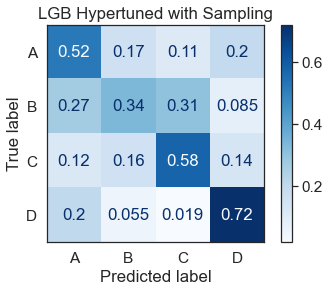

In [460]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')
g= plot_confusion_matrix(gs_grid, X_test2, y_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')
g.ax_.set_title('LGB Hypertuned with Sampling')


ROC AUC score for class A is 0.64
ROC AUC score for class B is 0.60
ROC AUC score for class C is 0.72
ROC AUC score for class D is 0.79


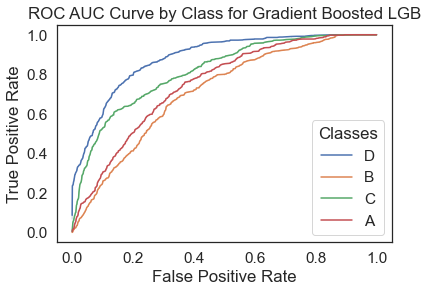

In [461]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay, plot_roc_curve

proba_gs = gs_grid.predict_proba(X_test2)
data = []
dic_gs = {}
dict_auc_gs = {}
classes = ['A', 'B', 'C', 'D']
for i in range(len(classes)):
    y_score_gs = proba_gs[:,i]
    cl_i = classes[i]
    prec_gs, recall_gs, _ = precision_recall_curve(y_test, y_score_gs, pos_label=cl_i)
    fpr_gs, tpr_gs, _ = roc_curve(y_test, y_score_gs, pos_label=cl_i)
    a1= zip(prec_gs, recall_gs, fpr_gs, tpr_gs)
    df2= pd.DataFrame(a1, columns=['prec', 'recall', 'False Positive Rate', 'True Positive Rate'])
    df2['Classes'] = classes[i]
    dic_gs[cl_i] = df2
    auc = roc_auc_score(y_test==cl_i,y_test_gs==cl_i)
    dict_auc_gs[cl_i] = auc 
df_gs= dic_gs['D'].append([dic_gs['B'], dic_gs['C'], dic_gs['A']])
sns.lineplot(x = 'False Positive Rate', y = 'True Positive Rate', data=df_gs, hue='Classes')
plt.title('ROC AUC Curve by Class for Gradient Boosted LGB')
plt.savefig("ROC AUC Curve by Class for Gradient Boosted LGB.png")
for i in range(len(classes)):
    cl_i = classes[i]
    print('ROC AUC score for class {} is {:.2f}'.format(cl_i, dict_auc_lgbg[cl_i]))


### Iterative 2  Gradient Based One Side sampling sampling:

In [462]:
import copy
params3 = copy.deepcopy(params) 
params3['boosting_type'] = 'goss'

other_rates = [0.2, 0.3]
top_rates = [0.1, 0.2, 0.4]

    
clf3 = lgb.LGBMClassifier(**params3)
go_grid = GridSearchCV(clf3, {'other_rate':other_rates, 'top_rate': top_rates}
                        , cv=5, scoring='accuracy')
go_grid.fit(X_train2, y_train, early_stopping_rounds=30, eval_set=[(X_train2, y_train), (X_test2, y_test)], eval_metric='multi_error', verbose=True)

# Predict on the test (and training) set to calculate metrics:
y_train_go = go_grid.predict(X_train2)
y_test_go = go_grid.predict(X_test2)


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.538719	valid_0's multi_logloss: 1.3313	valid_1's multi_error: 0.535903	valid_1's multi_logloss: 1.3335
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.493136	valid_0's multi_logloss: 1.28963	valid_1's multi_error: 0.498944	valid_1's multi_logloss: 1.29381
[3]	valid_0's multi_error: 0.475537	valid_0's multi_logloss: 1.25516	valid_1's multi_error: 0.485744	valid_1's multi_logloss: 1.26021
[4]	valid_0's multi_error: 0.471137	valid_0's multi_logloss: 1.22704	valid_1's multi_error: 0.488912	valid_1's multi_logloss: 1.23396
[5]	valid_0's multi_error: 0.466561	valid_0's multi_logloss: 1.20093	valid_1's multi_error: 0.492608	valid_1's multi_logloss: 1.20969
[6]	valid_0's multi

[63]	valid_0's multi_error: 0.425906	valid_0's multi_logloss: 0.98804	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.05406
[64]	valid_0's multi_error: 0.425906	valid_0's multi_logloss: 0.987132	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.05311
[65]	valid_0's multi_error: 0.42573	valid_0's multi_logloss: 0.98687	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.05279
[66]	valid_0's multi_error: 0.427138	valid_0's multi_logloss: 0.986178	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.05388
[67]	valid_0's multi_error: 0.427138	valid_0's multi_logloss: 0.985837	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.05442
[68]	valid_0's multi_error: 0.427842	valid_0's multi_logloss: 0.985376	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.05362
[69]	valid_0's multi_error: 0.426434	valid_0's multi_logloss: 0.984352	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.05377
[70]	valid_0's multi_error: 0.426434	valid_0's mult

[11]	valid_0's multi_error: 0.448962	valid_0's multi_logloss: 1.10457	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.11915
[12]	valid_0's multi_error: 0.44773	valid_0's multi_logloss: 1.09594	valid_1's multi_error: 0.457233	valid_1's multi_logloss: 1.11087
[13]	valid_0's multi_error: 0.445442	valid_0's multi_logloss: 1.09058	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.1064
[14]	valid_0's multi_error: 0.447202	valid_0's multi_logloss: 1.08491	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.10062
[15]	valid_0's multi_error: 0.446322	valid_0's multi_logloss: 1.07814	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.09425
[16]	valid_0's multi_error: 0.447026	valid_0's multi_logloss: 1.07165	valid_1's multi_error: 0.458817	valid_1's multi_logloss: 1.08874
[17]	valid_0's multi_error: 0.447906	valid_0's multi_logloss: 1.06591	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.08364
[18]	valid_0's multi_error: 0.448786	valid_0's multi_logl

[21]	valid_0's multi_error: 0.440514	valid_0's multi_logloss: 1.04832	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.07598
[22]	valid_0's multi_error: 0.442626	valid_0's multi_logloss: 1.04489	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.07413
[23]	valid_0's multi_error: 0.442098	valid_0's multi_logloss: 1.04102	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.07061
[24]	valid_0's multi_error: 0.439458	valid_0's multi_logloss: 1.03802	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.07009
[25]	valid_0's multi_error: 0.44069	valid_0's multi_logloss: 1.0352	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.06784
[26]	valid_0's multi_error: 0.437874	valid_0's multi_logloss: 1.033	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.06658
[27]	valid_0's multi_error: 0.437698	valid_0's multi_logloss: 1.02992	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.06314
[28]	valid_0's multi_error: 0.43629	valid_0's multi_logloss

[18]	valid_0's multi_error: 0.447202	valid_0's multi_logloss: 1.0607	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.08324
[19]	valid_0's multi_error: 0.448082	valid_0's multi_logloss: 1.05694	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.08059
[20]	valid_0's multi_error: 0.442626	valid_0's multi_logloss: 1.0527	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.07797
[21]	valid_0's multi_error: 0.445618	valid_0's multi_logloss: 1.04915	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.07529
[22]	valid_0's multi_error: 0.442978	valid_0's multi_logloss: 1.04533	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.07202
[23]	valid_0's multi_error: 0.441394	valid_0's multi_logloss: 1.04285	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06867
[24]	valid_0's multi_error: 0.437522	valid_0's multi_logloss: 1.03967	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06724
[25]	valid_0's multi_error: 0.43981	valid_0's multi_loglo

[8]	valid_0's multi_error: 0.450722	valid_0's multi_logloss: 1.14374	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.15862
[9]	valid_0's multi_error: 0.450194	valid_0's multi_logloss: 1.13055	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.14596
[10]	valid_0's multi_error: 0.451426	valid_0's multi_logloss: 1.11805	valid_1's multi_error: 0.474657	valid_1's multi_logloss: 1.13468
[11]	valid_0's multi_error: 0.447202	valid_0's multi_logloss: 1.10874	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.12637
[12]	valid_0's multi_error: 0.447554	valid_0's multi_logloss: 1.09896	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.11809
[13]	valid_0's multi_error: 0.446146	valid_0's multi_logloss: 1.09141	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.11104
[14]	valid_0's multi_error: 0.448082	valid_0's multi_logloss: 1.08363	valid_1's multi_error: 0.470961	valid_1's multi_logloss: 1.10488
[15]	valid_0's multi_error: 0.443682	valid_0's multi_logl

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.539423	valid_0's multi_logloss: 1.331	valid_1's multi_error: 0.540655	valid_1's multi_logloss: 1.3335
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.495072	valid_0's multi_logloss: 1.28962	valid_1's multi_error: 0.501056	valid_1's multi_logloss: 1.29422
[3]	valid_0's multi_error: 0.477649	valid_0's multi_logloss: 1.25512	valid_1's multi_error: 0.486272	valid_1's multi_logloss: 1.26058
[4]	valid_0's multi_error: 0.464977	valid_0's multi_logloss: 1.22699	valid_1's multi_error: 0.480993	valid_1's multi_logloss: 1.23414
[5]	valid_0's multi_error: 0.462689	valid_0's multi_logloss: 1.20032	valid_1's multi_error: 0.480465	valid_1's multi_logloss: 1.20956
[6]	valid_0's multi_

[23]	valid_0's multi_error: 0.434882	valid_0's multi_logloss: 1.03975	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.06494
[24]	valid_0's multi_error: 0.433474	valid_0's multi_logloss: 1.03615	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.06226
[25]	valid_0's multi_error: 0.434354	valid_0's multi_logloss: 1.03342	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06079
[26]	valid_0's multi_error: 0.43101	valid_0's multi_logloss: 1.03065	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05828
[27]	valid_0's multi_error: 0.431714	valid_0's multi_logloss: 1.02787	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.05699
[28]	valid_0's multi_error: 0.431186	valid_0's multi_logloss: 1.02629	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.05594
[29]	valid_0's multi_error: 0.429426	valid_0's multi_logloss: 1.02357	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.05315
[30]	valid_0's multi_error: 0.427138	valid_0's multi_log

[47]	valid_0's multi_error: 0.429602	valid_0's multi_logloss: 0.992687	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05492
[48]	valid_0's multi_error: 0.42925	valid_0's multi_logloss: 0.991535	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.0545
[49]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.990734	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05454
[50]	valid_0's multi_error: 0.42309	valid_0's multi_logloss: 0.989475	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.0546
[51]	valid_0's multi_error: 0.421507	valid_0's multi_logloss: 0.988956	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05436
[52]	valid_0's multi_error: 0.423794	valid_0's multi_logloss: 0.987659	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.0536
[53]	valid_0's multi_error: 0.423266	valid_0's multi_logloss: 0.986588	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05338
[54]	valid_0's multi_error: 0.421683	valid_0's multi_

[54]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.989242	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05078
[55]	valid_0's multi_error: 0.420275	valid_0's multi_logloss: 0.987816	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05267
[56]	valid_0's multi_error: 0.418691	valid_0's multi_logloss: 0.986567	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.05073
[57]	valid_0's multi_error: 0.417459	valid_0's multi_logloss: 0.985382	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.05065
[58]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.984	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.05036
[59]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.983135	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.05001
[60]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.982115	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.051
[61]	valid_0's multi_error: 0.418163	valid_0's multi_l

[23]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.03666	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.06896
[24]	valid_0's multi_error: 0.435234	valid_0's multi_logloss: 1.03322	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.06655
[25]	valid_0's multi_error: 0.434178	valid_0's multi_logloss: 1.03016	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.06508
[26]	valid_0's multi_error: 0.434706	valid_0's multi_logloss: 1.02745	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.06366
[27]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.02485	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.06292
[28]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.02186	valid_1's multi_error: 0.474129	valid_1's multi_logloss: 1.06146
[29]	valid_0's multi_error: 0.432594	valid_0's multi_logloss: 1.01942	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.06003
[30]	valid_0's multi_error: 0.43101	valid_0's multi_loglo

[101]	valid_0's multi_error: 0.391059	valid_0's multi_logloss: 0.9379	valid_1's multi_error: 0.472017	valid_1's multi_logloss: 1.04375
[102]	valid_0's multi_error: 0.392643	valid_0's multi_logloss: 0.937554	valid_1's multi_error: 0.473073	valid_1's multi_logloss: 1.04404
[103]	valid_0's multi_error: 0.394051	valid_0's multi_logloss: 0.93671	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.04463
[104]	valid_0's multi_error: 0.394227	valid_0's multi_logloss: 0.935982	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.04451
[105]	valid_0's multi_error: 0.392819	valid_0's multi_logloss: 0.935257	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.04441
Early stopping, best iteration is:
[75]	valid_0's multi_error: 0.406547	valid_0's multi_logloss: 0.959153	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.04352
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accu

[1]	valid_0's multi_error: 0.549982	valid_0's multi_logloss: 1.33117	valid_1's multi_error: 0.548574	valid_1's multi_logloss: 1.33297
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_error: 0.486976	valid_0's multi_logloss: 1.29001	valid_1's multi_error: 0.485216	valid_1's multi_logloss: 1.29303
[3]	valid_0's multi_error: 0.464097	valid_0's multi_logloss: 1.25391	valid_1's multi_error: 0.475713	valid_1's multi_logloss: 1.25799
[4]	valid_0's multi_error: 0.461809	valid_0's multi_logloss: 1.22524	valid_1's multi_error: 0.475185	valid_1's multi_logloss: 1.23011
[5]	valid_0's multi_error: 0.456353	valid_0's multi_logloss: 1.19829	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.20561
[6]	valid_0's multi_error: 0.453713	valid_0's multi_logloss: 1.17559	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.18538
[7]	valid_0's multi_error: 0.44949	valid_0's multi_logloss: 1.15679	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.16799
[8

[21]	valid_0's multi_error: 0.438402	valid_0's multi_logloss: 1.04324	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.07489
[22]	valid_0's multi_error: 0.437698	valid_0's multi_logloss: 1.03941	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.07216
[23]	valid_0's multi_error: 0.435938	valid_0's multi_logloss: 1.03561	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.06944
[24]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.03193	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.06731
[25]	valid_0's multi_error: 0.437698	valid_0's multi_logloss: 1.02927	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.06564
[26]	valid_0's multi_error: 0.436994	valid_0's multi_logloss: 1.02627	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06399
[27]	valid_0's multi_error: 0.43277	valid_0's multi_logloss: 1.0236	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.06274
[28]	valid_0's multi_error: 0.43277	valid_0's multi_loglos

[21]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.04416	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.07175
[22]	valid_0's multi_error: 0.437874	valid_0's multi_logloss: 1.04044	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06848
[23]	valid_0's multi_error: 0.436994	valid_0's multi_logloss: 1.03687	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.06616
[24]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.03403	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.06424
[25]	valid_0's multi_error: 0.435234	valid_0's multi_logloss: 1.03124	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06244
[26]	valid_0's multi_error: 0.43629	valid_0's multi_logloss: 1.028	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.06066
[27]	valid_0's multi_error: 0.434002	valid_0's multi_logloss: 1.02471	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.05817
[28]	valid_0's multi_error: 0.43101	valid_0's multi_loglos

[40]	valid_0's multi_error: 0.424674	valid_0's multi_logloss: 1.00377	valid_1's multi_error: 0.471489	valid_1's multi_logloss: 1.05111
[41]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 1.00182	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05031
[42]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 1.00019	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.0502
[43]	valid_0's multi_error: 0.424498	valid_0's multi_logloss: 0.999432	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.05018
[44]	valid_0's multi_error: 0.42485	valid_0's multi_logloss: 0.998247	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04974
[45]	valid_0's multi_error: 0.424146	valid_0's multi_logloss: 0.997203	valid_1's multi_error: 0.466737	valid_1's multi_logloss: 1.04948
[46]	valid_0's multi_error: 0.421859	valid_0's multi_logloss: 0.995786	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.04903
[47]	valid_0's multi_error: 0.421155	valid_0's multi_

[23]	valid_0's multi_error: 0.441922	valid_0's multi_logloss: 1.04056	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.07183
[24]	valid_0's multi_error: 0.441218	valid_0's multi_logloss: 1.03748	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.06968
[25]	valid_0's multi_error: 0.440866	valid_0's multi_logloss: 1.03443	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.06893
[26]	valid_0's multi_error: 0.438402	valid_0's multi_logloss: 1.03132	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.06754
[27]	valid_0's multi_error: 0.437346	valid_0's multi_logloss: 1.02867	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.06638
[28]	valid_0's multi_error: 0.435058	valid_0's multi_logloss: 1.02629	valid_1's multi_error: 0.473601	valid_1's multi_logloss: 1.06502
[29]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.02411	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06309
[30]	valid_0's multi_error: 0.43277	valid_0's multi_logl

[28]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.02434	valid_1's multi_error: 0.455649	valid_1's multi_logloss: 1.05543
[29]	valid_0's multi_error: 0.43189	valid_0's multi_logloss: 1.02133	valid_1's multi_error: 0.457761	valid_1's multi_logloss: 1.05317
[30]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.0191	valid_1's multi_error: 0.458817	valid_1's multi_logloss: 1.05135
[31]	valid_0's multi_error: 0.431714	valid_0's multi_logloss: 1.01708	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.05115
[32]	valid_0's multi_error: 0.433298	valid_0's multi_logloss: 1.01499	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.04962
[33]	valid_0's multi_error: 0.43365	valid_0's multi_logloss: 1.01317	valid_1's multi_error: 0.460929	valid_1's multi_logloss: 1.04795
[34]	valid_0's multi_error: 0.431714	valid_0's multi_logloss: 1.0105	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.04783
[35]	valid_0's multi_error: 0.432418	valid_0's multi_logloss

[39]	valid_0's multi_error: 0.42573	valid_0's multi_logloss: 1.00525	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.05703
[40]	valid_0's multi_error: 0.426434	valid_0's multi_logloss: 1.00412	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.05696
[41]	valid_0's multi_error: 0.42749	valid_0's multi_logloss: 1.00308	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.05722
[42]	valid_0's multi_error: 0.426434	valid_0's multi_logloss: 1.00152	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.05697
[43]	valid_0's multi_error: 0.425202	valid_0's multi_logloss: 1.00025	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.05627
[44]	valid_0's multi_error: 0.426962	valid_0's multi_logloss: 0.998877	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05662
[45]	valid_0's multi_error: 0.425026	valid_0's multi_logloss: 0.998333	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05624
[46]	valid_0's multi_error: 0.424674	valid_0's multi_lo

[54]	valid_0's multi_error: 0.420275	valid_0's multi_logloss: 0.985849	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.04641
[55]	valid_0's multi_error: 0.420803	valid_0's multi_logloss: 0.984536	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.04683
[56]	valid_0's multi_error: 0.422034	valid_0's multi_logloss: 0.98338	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.0469
Early stopping, best iteration is:
[26]	valid_0's multi_error: 0.436114	valid_0's multi_logloss: 1.02963	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06446
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.538719	valid_0's multi_logloss: 1.3313	valid_1's multi_error: 0.535903	valid_1's multi_logloss: 1.3335
Training until validation scores don't i

[62]	valid_0's multi_error: 0.421155	valid_0's multi_logloss: 0.975678	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.04492
[63]	valid_0's multi_error: 0.421859	valid_0's multi_logloss: 0.97478	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.04491
[64]	valid_0's multi_error: 0.420099	valid_0's multi_logloss: 0.973612	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.04482
[65]	valid_0's multi_error: 0.421155	valid_0's multi_logloss: 0.972558	valid_1's multi_error: 0.465681	valid_1's multi_logloss: 1.04498
[66]	valid_0's multi_error: 0.420627	valid_0's multi_logloss: 0.971706	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.04462
[67]	valid_0's multi_error: 0.419571	valid_0's multi_logloss: 0.970556	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04449
[68]	valid_0's multi_error: 0.416755	valid_0's multi_logloss: 0.970137	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04458
[69]	valid_0's multi_error: 0.414291	valid_0's mu

[39]	valid_0's multi_error: 0.424674	valid_0's multi_logloss: 1.00189	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.04909
[40]	valid_0's multi_error: 0.420451	valid_0's multi_logloss: 1.00036	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.04843
[41]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.998979	valid_1's multi_error: 0.459873	valid_1's multi_logloss: 1.04816
[42]	valid_0's multi_error: 0.421507	valid_0's multi_logloss: 0.997298	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.04817
[43]	valid_0's multi_error: 0.42397	valid_0's multi_logloss: 0.996026	valid_1's multi_error: 0.457761	valid_1's multi_logloss: 1.04732
[44]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.994246	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.04747
[45]	valid_0's multi_error: 0.419043	valid_0's multi_logloss: 0.993129	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.0467
[46]	valid_0's multi_error: 0.419395	valid_0's multi_l

[30]	valid_0's multi_error: 0.430658	valid_0's multi_logloss: 1.01577	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.05226
[31]	valid_0's multi_error: 0.429602	valid_0's multi_logloss: 1.01424	valid_1's multi_error: 0.458289	valid_1's multi_logloss: 1.05134
[32]	valid_0's multi_error: 0.431186	valid_0's multi_logloss: 1.01256	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.05046
[33]	valid_0's multi_error: 0.432242	valid_0's multi_logloss: 1.01063	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.04948
[34]	valid_0's multi_error: 0.431538	valid_0's multi_logloss: 1.00827	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.04759
[35]	valid_0's multi_error: 0.430658	valid_0's multi_logloss: 1.00628	valid_1's multi_error: 0.460401	valid_1's multi_logloss: 1.04678
[36]	valid_0's multi_error: 0.429954	valid_0's multi_logloss: 1.00468	valid_1's multi_error: 0.458817	valid_1's multi_logloss: 1.04652
[37]	valid_0's multi_error: 0.430306	valid_0's multi_lo

[21]	valid_0's multi_error: 0.439458	valid_0's multi_logloss: 1.04566	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.07584
[22]	valid_0's multi_error: 0.440866	valid_0's multi_logloss: 1.04176	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.07188
[23]	valid_0's multi_error: 0.440162	valid_0's multi_logloss: 1.03762	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.07031
[24]	valid_0's multi_error: 0.436114	valid_0's multi_logloss: 1.03468	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.06797
[25]	valid_0's multi_error: 0.433122	valid_0's multi_logloss: 1.0312	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.06616
[26]	valid_0's multi_error: 0.432946	valid_0's multi_logloss: 1.02822	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.0641
[27]	valid_0's multi_error: 0.433122	valid_0's multi_logloss: 1.02512	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.06207
[28]	valid_0's multi_error: 0.434354	valid_0's multi_logl

[23]	valid_0's multi_error: 0.439634	valid_0's multi_logloss: 1.03727	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.06813
[24]	valid_0's multi_error: 0.43981	valid_0's multi_logloss: 1.03473	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.06645
[25]	valid_0's multi_error: 0.43717	valid_0's multi_logloss: 1.03187	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.06515
[26]	valid_0's multi_error: 0.435234	valid_0's multi_logloss: 1.02862	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.06273
[27]	valid_0's multi_error: 0.43453	valid_0's multi_logloss: 1.02597	valid_1's multi_error: 0.461457	valid_1's multi_logloss: 1.06181
[28]	valid_0's multi_error: 0.43365	valid_0's multi_logloss: 1.02332	valid_1's multi_error: 0.464097	valid_1's multi_logloss: 1.05999
[29]	valid_0's multi_error: 0.434002	valid_0's multi_logloss: 1.02124	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.05887
[30]	valid_0's multi_error: 0.433298	valid_0's multi_loglos

[25]	valid_0's multi_error: 0.434002	valid_0's multi_logloss: 1.02977	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.06404
[26]	valid_0's multi_error: 0.435762	valid_0's multi_logloss: 1.02657	valid_1's multi_error: 0.472545	valid_1's multi_logloss: 1.06176
[27]	valid_0's multi_error: 0.432594	valid_0's multi_logloss: 1.02328	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.06058
[28]	valid_0's multi_error: 0.432418	valid_0's multi_logloss: 1.02076	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.05894
[29]	valid_0's multi_error: 0.43189	valid_0's multi_logloss: 1.0173	valid_1's multi_error: 0.470433	valid_1's multi_logloss: 1.05703
[30]	valid_0's multi_error: 0.429954	valid_0's multi_logloss: 1.01471	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.05551
[31]	valid_0's multi_error: 0.429426	valid_0's multi_logloss: 1.01263	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.05451
[32]	valid_0's multi_error: 0.428018	valid_0's multi_logl

[86]	valid_0's multi_error: 0.400387	valid_0's multi_logloss: 0.947428	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.03786
[87]	valid_0's multi_error: 0.399507	valid_0's multi_logloss: 0.94621	valid_1's multi_error: 0.468321	valid_1's multi_logloss: 1.03818
[88]	valid_0's multi_error: 0.398803	valid_0's multi_logloss: 0.945096	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.03806
[89]	valid_0's multi_error: 0.399155	valid_0's multi_logloss: 0.944187	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.03827
Early stopping, best iteration is:
[59]	valid_0's multi_error: 0.414995	valid_0's multi_logloss: 0.973009	valid_1's multi_error: 0.459345	valid_1's multi_logloss: 1.03949
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's multi_error: 0.53942

[62]	valid_0's multi_error: 0.403555	valid_0's multi_logloss: 0.964921	valid_1's multi_error: 0.465153	valid_1's multi_logloss: 1.04521
[63]	valid_0's multi_error: 0.402147	valid_0's multi_logloss: 0.963512	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04491
[64]	valid_0's multi_error: 0.402323	valid_0's multi_logloss: 0.962559	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.0452
[65]	valid_0's multi_error: 0.401619	valid_0's multi_logloss: 0.961732	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.045
[66]	valid_0's multi_error: 0.400915	valid_0's multi_logloss: 0.960781	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.0445
[67]	valid_0's multi_error: 0.401267	valid_0's multi_logloss: 0.959838	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04468
[68]	valid_0's multi_error: 0.401795	valid_0's multi_logloss: 0.958913	valid_1's multi_error: 0.468849	valid_1's multi_logloss: 1.0448
[69]	valid_0's multi_error: 0.400035	valid_0's multi_

[52]	valid_0's multi_error: 0.418163	valid_0's multi_logloss: 0.979916	valid_1's multi_error: 0.454593	valid_1's multi_logloss: 1.03684
[53]	valid_0's multi_error: 0.419043	valid_0's multi_logloss: 0.979066	valid_1's multi_error: 0.450898	valid_1's multi_logloss: 1.03694
[54]	valid_0's multi_error: 0.420275	valid_0's multi_logloss: 0.977867	valid_1's multi_error: 0.45037	valid_1's multi_logloss: 1.03668
[55]	valid_0's multi_error: 0.417987	valid_0's multi_logloss: 0.976448	valid_1's multi_error: 0.45301	valid_1's multi_logloss: 1.03725
[56]	valid_0's multi_error: 0.416051	valid_0's multi_logloss: 0.975128	valid_1's multi_error: 0.455649	valid_1's multi_logloss: 1.03658
[57]	valid_0's multi_error: 0.415699	valid_0's multi_logloss: 0.973794	valid_1's multi_error: 0.454065	valid_1's multi_logloss: 1.03616
[58]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.972747	valid_1's multi_error: 0.451426	valid_1's multi_logloss: 1.03579
[59]	valid_0's multi_error: 0.412531	valid_0's mul

[41]	valid_0's multi_error: 0.423266	valid_0's multi_logloss: 0.993864	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04925
[42]	valid_0's multi_error: 0.422738	valid_0's multi_logloss: 0.991974	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04935
[43]	valid_0's multi_error: 0.422562	valid_0's multi_logloss: 0.990467	valid_1's multi_error: 0.466209	valid_1's multi_logloss: 1.04906
[44]	valid_0's multi_error: 0.420803	valid_0's multi_logloss: 0.988946	valid_1's multi_error: 0.467265	valid_1's multi_logloss: 1.04905
[45]	valid_0's multi_error: 0.42221	valid_0's multi_logloss: 0.987594	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.04848
[46]	valid_0's multi_error: 0.419747	valid_0's multi_logloss: 0.986263	valid_1's multi_error: 0.469377	valid_1's multi_logloss: 1.04808
[47]	valid_0's multi_error: 0.419923	valid_0's multi_logloss: 0.984822	valid_1's multi_error: 0.469905	valid_1's multi_logloss: 1.04753
[48]	valid_0's multi_error: 0.421155	valid_0's mu

[50]	valid_0's multi_error: 0.413235	valid_0's multi_logloss: 0.978508	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.04061
[51]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.977347	valid_1's multi_error: 0.463569	valid_1's multi_logloss: 1.04068
[52]	valid_0's multi_error: 0.413939	valid_0's multi_logloss: 0.976076	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.03994
[53]	valid_0's multi_error: 0.414995	valid_0's multi_logloss: 0.97529	valid_1's multi_error: 0.461985	valid_1's multi_logloss: 1.03984
[54]	valid_0's multi_error: 0.414819	valid_0's multi_logloss: 0.973806	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.03962
[55]	valid_0's multi_error: 0.414643	valid_0's multi_logloss: 0.972635	valid_1's multi_error: 0.463041	valid_1's multi_logloss: 1.04026
[56]	valid_0's multi_error: 0.413059	valid_0's multi_logloss: 0.971465	valid_1's multi_error: 0.464625	valid_1's multi_logloss: 1.04034
[57]	valid_0's multi_error: 0.413059	valid_0's mu

[58]	training's multi_error: 0.404787	training's multi_logloss: 0.958521	valid_1's multi_error: 0.467793	valid_1's multi_logloss: 1.03834
Early stopping, best iteration is:
[28]	training's multi_error: 0.427314	training's multi_logloss: 1.01268	valid_1's multi_error: 0.462513	valid_1's multi_logloss: 1.05302


In [463]:
from sklearn.metrics import confusion_matrix

print('Best parameters for n_estimators, reg_alpha, and subsample: \n')
print(go_grid.best_params_, go_grid.best_score_)

auc_go= accuracy_score(y_test, y_test_go)
prec_go= precision_score(y_test, y_test_go, average='weighted')
n_go= 'LGB HP with Gradient sampling'
cl_go = [n_go, auc_go, prec_go]
print('For {} average accuracy is {:.4f} and average precision is {:.4f}'.format(n_go, auc_go, prec_go))


print("\n[Training Classification Report:]")
print(classification_report(y_train, y_train_go))

print("[Test Classification Report:]")
print(classification_report(y_test, y_test_go))

Best parameters for n_estimators, reg_alpha, and subsample: 

{'other_rate': 0.3, 'top_rate': 0.4} 0.5348442900144933
For LGB HP with Gradient sampling average accuracy is 0.5375 and average precision is 0.5273

[Training Classification Report:]
              precision    recall  f1-score   support

           A       0.50      0.52      0.51      1382
           B       0.49      0.36      0.42      1341
           C       0.60      0.62      0.61      1419
           D       0.65      0.75      0.70      1540

    accuracy                           0.57      5682
   macro avg       0.56      0.57      0.56      5682
weighted avg       0.56      0.57      0.57      5682

[Test Classification Report:]
              precision    recall  f1-score   support

           A       0.45      0.48      0.46       461
           B       0.43      0.31      0.36       447
           C       0.58      0.60      0.59       473
           D       0.64      0.73      0.68       513

    accuracy     

### Compare

LGB HP with Gradient sampling AUC = 0.537
[[0.47939262 0.164859   0.13882863 0.21691974]
 [0.30425056 0.27069351 0.33557047 0.08948546]
 [0.11627907 0.14376321 0.59408034 0.14587738]
 [0.18128655 0.07017544 0.03508772 0.71345029]]
LGB with Hypertuned Parameters (HP) AUC = 0.536
[[0.45553145 0.19305857 0.12147505 0.22993492]
 [0.25727069 0.32662192 0.31767338 0.098434  ]
 [0.11205074 0.1564482  0.59408034 0.13742072]
 [0.1871345  0.06042885 0.01559454 0.73684211]]
LGB HP with GBDT sampling AUC = 0.548
[[0.52277657 0.1670282  0.11062907 0.19956616]
 [0.27069351 0.33780761 0.3064877  0.08501119]
 [0.11839323 0.16067653 0.58139535 0.13953488]
 [0.20467836 0.0545809  0.01949318 0.72124756]]
LGB HP with Gradient sampling AUC = 0.537
[[0.47722343 0.18438178 0.11713666 0.22125813]
 [0.26845638 0.30872483 0.33557047 0.08724832]
 [0.10359408 0.14799154 0.60465116 0.14376321]
 [0.19688109 0.06042885 0.01364522 0.72904483]]


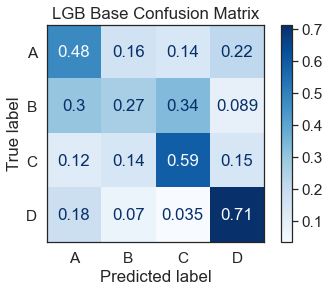

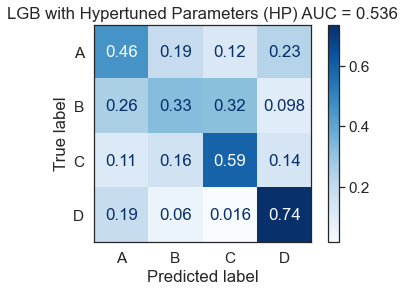

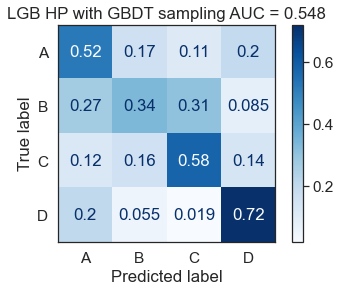

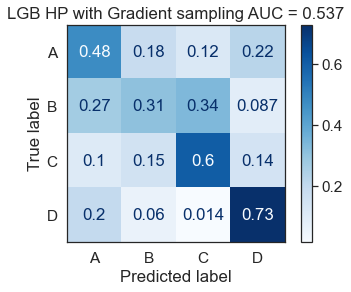

In [464]:
#from sklearn.metrics import plot_confusion_matrix

l_names = ['A', 'B', 'C', 'D'] 
pred_lgb = lgb_clf.predict(X_test_lgb)
prec_lgb = precision_score(y_test, pred_lgb, average= 'weighted')
auc_lgb = accuracy_score(y_test, pred_lgb)
n_lgb = 'LGB Base'
cl_lgb= [n_lgb, auc_lgb, prec_lgb]


sns.set_style('white')
sns.set_style(None)
# Plot non-normalized confusion matrix
titles_options = [('{} AUC = {:.3f}'.format(n_lgbh, auc_lgbh), clf_grid.best_estimator_),
                  ('{} AUC = {:.3f}'.format(n_gs, auc_gs), gs_grid.best_estimator_),
                  ('{} AUC = {:.3f}'.format(n_go, auc_go), go_grid.best_estimator_)
                 ]

h= plot_confusion_matrix(lgb_clf, X_test_lgb, y_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')
h.ax_.set_title('LGB Base Confusion Matrix')
print(title)
print(h.confusion_matrix)

for title, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test2, y_test, display_labels=l_names,
                                 cmap=plt.cm.Blues, 
                                 normalize='true')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [465]:
score_columns= ['Algorithm', 'Accuracy Test',  'Precision Test']
c_data1 =[cl_lgb, cl_lgbh, cl_gs, cl_go]
score_tab1 = pd.DataFrame(c_data1, columns= score_columns )
pd.options.display.float_format = '{:.3f}'.format
score_tab1.sort_values('Accuracy Test')

,Algorithm,Accuracy Test,Precision Test
0,LGB Base,0.522,0.511
1,LGB with Hypertuned Parameters (HP),0.536,0.526
3,LGB HP with Gradient sampling,0.537,0.527
2,LGB HP with GBDT sampling,0.548,0.542


## Conclusion

##### We chose LGB model with traditional sampling as it has the highest average accuracy and  weighted precision score
As we can see from the above both hypertuning the parameters and adding sampling improved the model.

#### Sampling Improvement
* Improved overall average accuracy of the model from 0.52 in the base model to 0.55.
* Improved overall average weighted precision of the model from 0.51 in the base model to 0.53.
* Sampling especially improved predicting the B class samples.

#### New Model Evaluation
* Our target for success was to have a greater than 50% average accuracy and 50% average precision
* This new model has an around 54% Accuracy
* This new model has an around 53% Precision 

## Predictions for new Market

In [468]:
#Load Data
file_name_path2 = os.path.join(basepath, sub_file, file2)
new_market= pd.read_csv(file_name_path2)


#Data Cleaning
#fill missing
new_market['Var_1'] = new_market['Var_1'].fillna('Cat_0')
new_market['Ever_Married'] = new_market['Ever_Married'].fillna('zMissing')
new_market['Graduated'] = new_market['Graduated'].fillna('zMissing')
new_market['Profession'] = new_market['Profession'].fillna('zMissing')

#Spending Score change to Ordinals
new_market['Spending_Score'] = new_market['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
new_market['Spending_Score']=new_market['Spending_Score'].astype('int')

#Encode Var_1
new_market['Var_1']=new_market['Var_1'].apply(lambda x:x[-1])
new_market['Var_1']=new_market['Var_1'].astype('int')

#new_market['Segmentation']=new_market['Segmentation'].astype('category')
#print(new_market.Segmentation.value_counts())

#Change Data types
categorical_features = train.select_dtypes(exclude=['int32', 'int64','float64']).columns.tolist()
categorical_features.remove('Segmentation')

for col in categorical_features:
    new_market[col] = new_market[col].astype('category')

new_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2627 non-null   int64   
 1   Gender           2627 non-null   category
 2   Ever_Married     2627 non-null   category
 3   Age              2627 non-null   int64   
 4   Graduated        2627 non-null   category
 5   Profession       2627 non-null   category
 6   Work_Experience  2358 non-null   float64 
 7   Spending_Score   2627 non-null   int32   
 8   Family_Size      2514 non-null   float64 
 9   Var_1            2627 non-null   int32   
dtypes: category(4), float64(2), int32(2), int64(2)
memory usage: 113.7 KB


In [472]:
#Seperate and Predict
X_new = new_market.drop(columns= [ 'ID' ], axis=1)

#Transform features
X_new= ct2.fit_transform(X_new)
X_new = pd.DataFrame(X_new, columns=col3)

#Predict
y_new_pr = gs_grid.predict(X_new)
y_new_pr = pd.DataFrame(y_new_pr, columns=['New Prediction'])

In [481]:
prediction_count = y_new_pr.value_counts().rename('Count').rename_axis('Customer Segment').reset_index()
prediction_count['As a Percentage']= 100*prediction_count['Count']/2626
pd.options.display.float_format = '{:.1f}%'.format
prediction_count

,Customer Segment,Count,As a Percentage
0,D,812,30.9%
1,A,753,28.7%
2,C,611,23.3%
3,B,451,17.2%
